In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib as mlb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import silhouette_samples
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV,train_test_split 
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import silhouette_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
df = pd.read_csv('diabetic_data.csv')
df = pd.DataFrame(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [6]:
shape = df.shape
shape

(101766, 50)

In [7]:
df.drop(['encounter_id'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   patient_nbr               101766 non-null  int64 
 1   race                      101766 non-null  object
 2   gender                    101766 non-null  object
 3   age                       101766 non-null  object
 4   weight                    101766 non-null  object
 5   admission_type_id         101766 non-null  int64 
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   payer_code                101766 non-null  object
 10  medical_specialty         101766 non-null  object
 11  num_lab_procedures        101766 non-null  int64 
 12  num_procedures            101766 non-null  int64 
 13  num_medications           101766 non-null  int64 
 14  numb

In [8]:
percent_missing = df.isna().sum().sort_values(ascending=False)/len(df)*100
pd.DataFrame(percent_missing, columns=['Percentage of Missing values'])

,Percentage of Missing values
max_glu_serum,94.746772
A1Cresult,83.277322
patient_nbr,0.000000
troglitazone,0.000000
acetohexamide,0.000000
glipizide,0.000000
glyburide,0.000000
tolbutamide,0.000000
pioglitazone,0.000000
rosiglitazone,0.000000


In [9]:
df.replace('?', pd.NA, inplace=True)

In [10]:
percent_missing = df.isna().sum().sort_values(ascending=False)/len(df)*100
pd.DataFrame(percent_missing, columns=['Percentage of Missing values'])

,Percentage of Missing values
weight,96.858479
max_glu_serum,94.746772
A1Cresult,83.277322
medical_specialty,49.082208
payer_code,39.557416
race,2.233555
diag_3,1.398306
diag_2,0.351787
diag_1,0.020636
patient_nbr,0.000000


In [11]:
df['readmitted'].replace({'<30': 1, '>30': 0, 'NO': 0}, inplace=True)

In [12]:
df['readmitted'].describe()

count    101766.000000
mean          0.111599
std           0.314874
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: readmitted, dtype: float64

In [13]:
data_types = pd.DataFrame({'Column Name': df.columns, 'Data Type': df.dtypes})
data_types

,Column Name,Data Type
patient_nbr,patient_nbr,int64
race,race,object
gender,gender,object
age,age,object
weight,weight,object
admission_type_id,admission_type_id,int64
discharge_disposition_id,discharge_disposition_id,int64
admission_source_id,admission_source_id,int64
time_in_hospital,time_in_hospital,int64
payer_code,payer_code,object


In [14]:
df.shape

(101766, 49)

In [15]:
columns_to_drop = percent_missing[percent_missing > 90].index
df.drop(columns=columns_to_drop, inplace=True)

In [16]:
df.shape

(101766, 47)

In [17]:
df.drop(['repaglinide', 'nateglinide','chlorpropamide','glimepiride','acetohexamide' ,'tolbutamide','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','glyburide-metformin', 'glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone'], axis = 1, inplace = True)


In [18]:
df.shape

(101766, 30)

In [19]:
#df.dropna(how='all', inplace=True)
df.dropna(axis = 0, inplace = True)

In [20]:
df.shape

(4166, 30)

In [21]:
percent_missing = df.isna().sum().sort_values(ascending=False)/len(df)*100
pd.DataFrame(percent_missing, columns=['Percentage of Missing values'])

,Percentage of Missing values
patient_nbr,0.0
race,0.0
diabetesMed,0.0
change,0.0
insulin,0.0
rosiglitazone,0.0
pioglitazone,0.0
glyburide,0.0
glipizide,0.0
metformin,0.0


In [22]:
df['readmitted'] = df['readmitted'].astype(str)

In [23]:
cat_cols = [col for col in df.columns if df[col].dtypes == 'O']
print('Catagrical Variables :', cat_cols)
print('\n')
num_cols = [col for col in df.columns if df[col].dtypes != 'O' and df[col].dtype != '<M8[ns]']
print('Continous variable :', num_cols)
print('\n')

Catagrical Variables : ['race', 'gender', 'age', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'A1Cresult', 'metformin', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted']


Continous variable : ['patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']




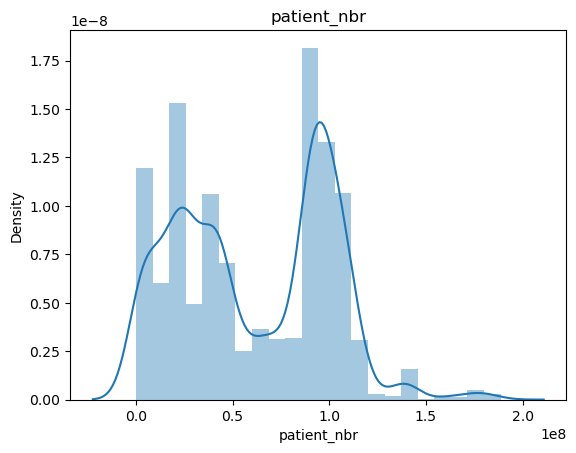

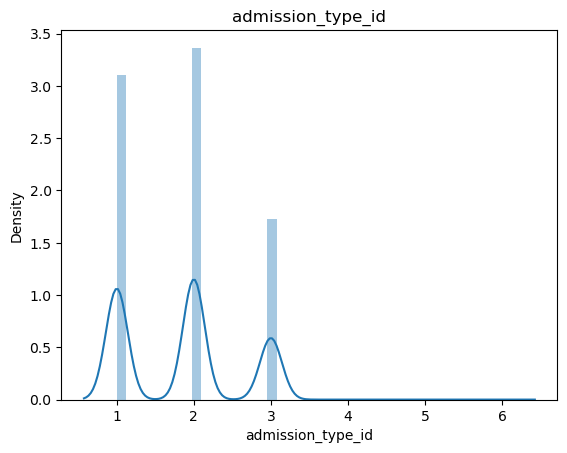

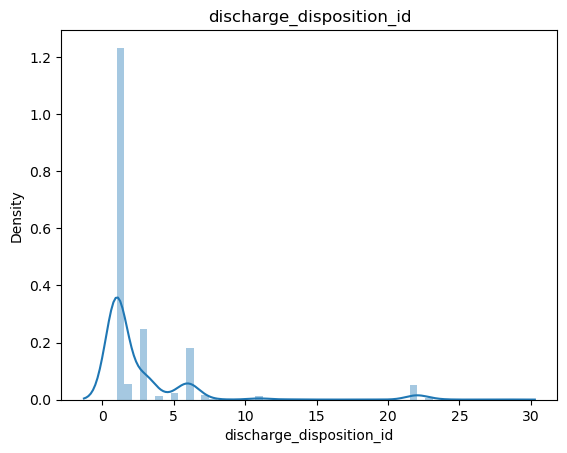

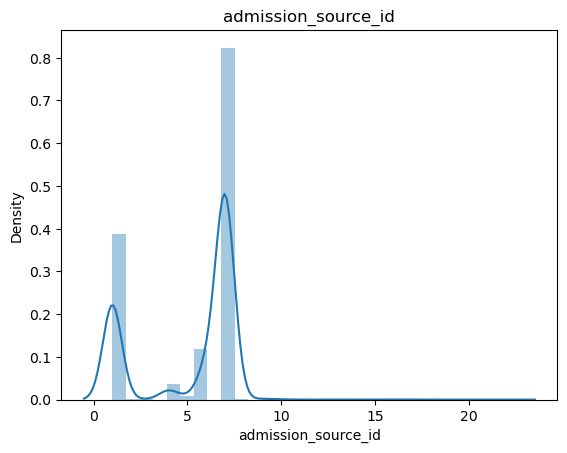

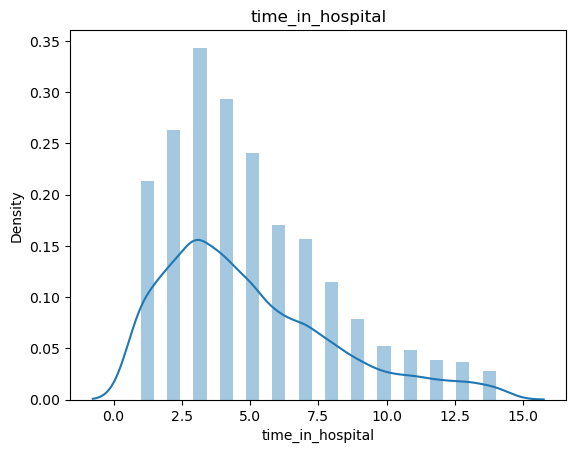

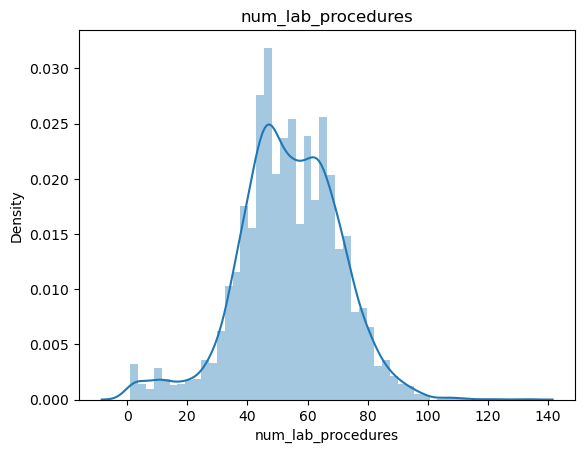

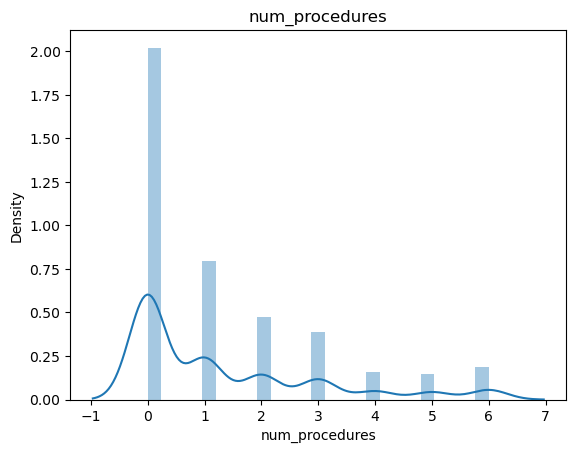

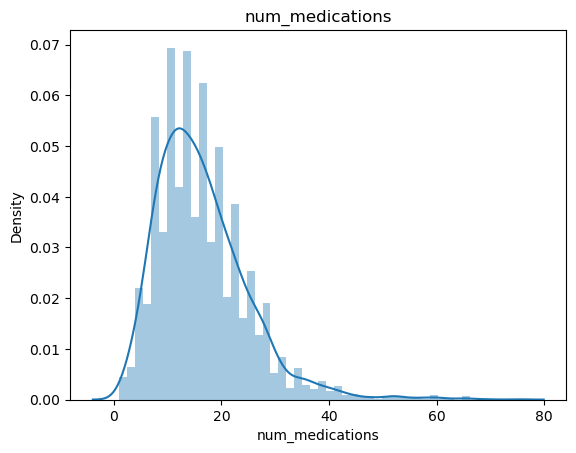

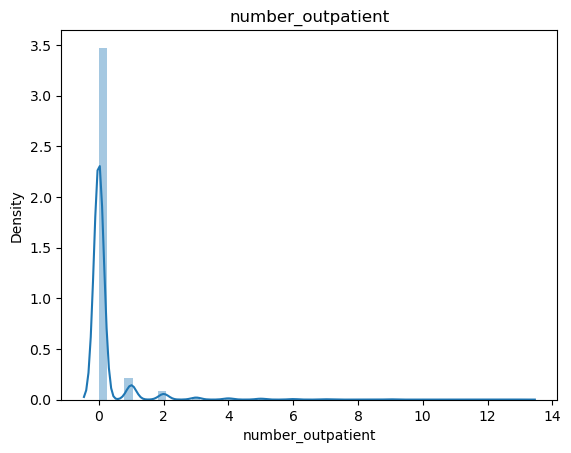

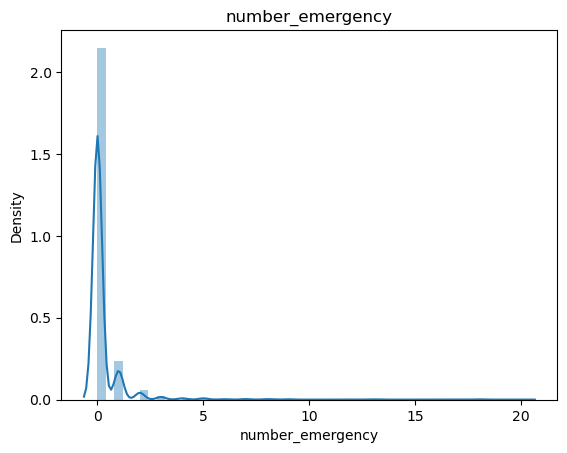

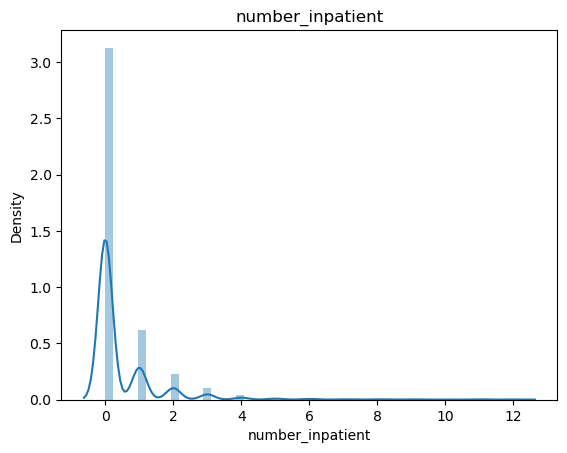

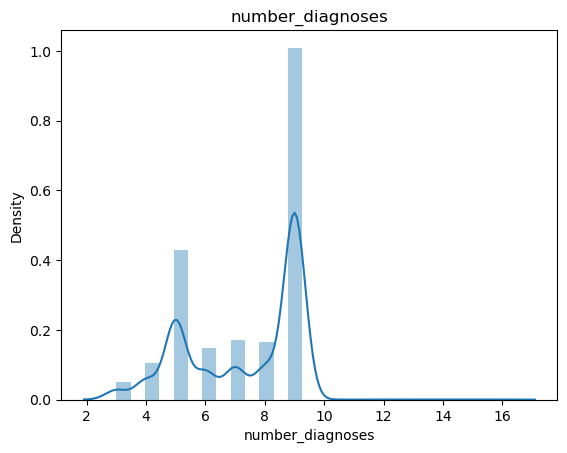

<Figure size 640x480 with 0 Axes>

In [24]:
for i in num_cols:
    sns.distplot(df[i])
    plt.title(i)
    plt.figure()

In [25]:
df.describe()

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,4.166000e+03,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000
mean,6.124034e+07,1.833413,2.697312,5.148104,4.944311,53.853577,1.292847,16.390302,0.195151,0.279885,0.456553,7.325012
std,3.936169e+07,0.753764,4.024514,2.673494,3.107173,16.695628,1.704082,8.635939,0.813798,1.128657,1.109993,1.923753
min,7.290000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000
25%,2.480188e+07,1.000000,1.000000,1.000000,3.000000,44.000000,0.000000,10.000000,0.000000,0.000000,0.000000,5.000000
50%,5.984079e+07,2.000000,1.000000,7.000000,4.000000,54.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,9.483692e+07,2.000000,3.000000,7.000000,7.000000,65.000000,2.000000,21.000000,0.000000,0.000000,0.000000,9.000000
max,1.886349e+08,6.000000,28.000000,22.000000,14.000000,132.000000,6.000000,75.000000,13.000000,20.000000,12.000000,16.000000


In [26]:
df.describe()

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,4.166000e+03,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000,4166.000000
mean,6.124034e+07,1.833413,2.697312,5.148104,4.944311,53.853577,1.292847,16.390302,0.195151,0.279885,0.456553,7.325012
std,3.936169e+07,0.753764,4.024514,2.673494,3.107173,16.695628,1.704082,8.635939,0.813798,1.128657,1.109993,1.923753
min,7.290000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000
25%,2.480188e+07,1.000000,1.000000,1.000000,3.000000,44.000000,0.000000,10.000000,0.000000,0.000000,0.000000,5.000000
50%,5.984079e+07,2.000000,1.000000,7.000000,4.000000,54.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,9.483692e+07,2.000000,3.000000,7.000000,7.000000,65.000000,2.000000,21.000000,0.000000,0.000000,0.000000,9.000000
max,1.886349e+08,6.000000,28.000000,22.000000,14.000000,132.000000,6.000000,75.000000,13.000000,20.000000,12.000000,16.000000


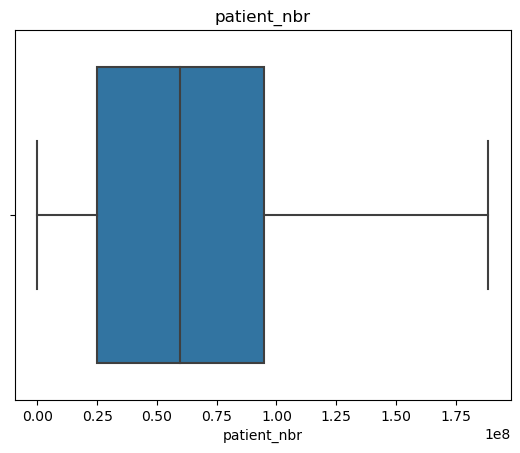

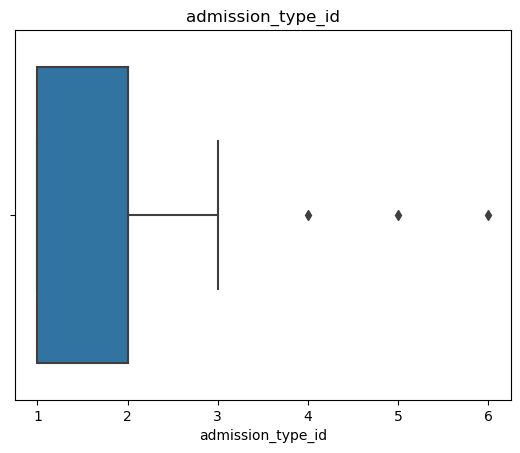

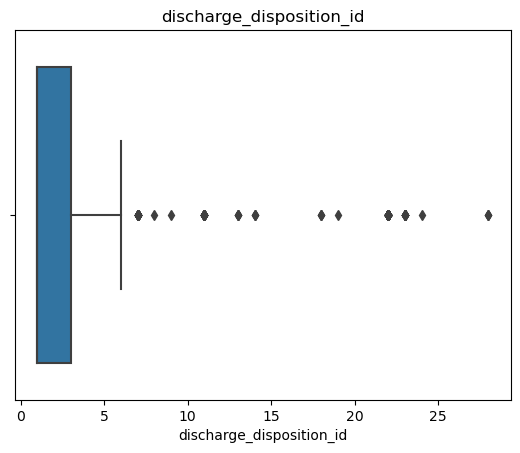

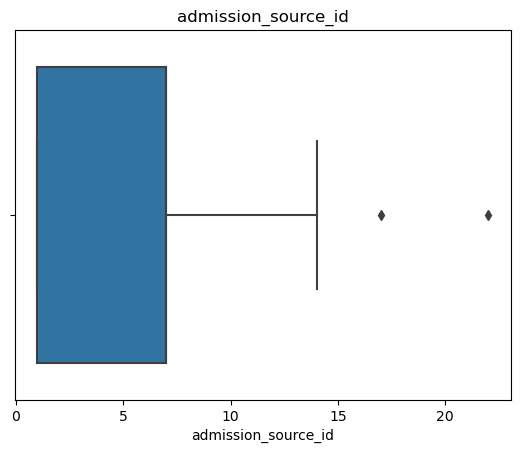

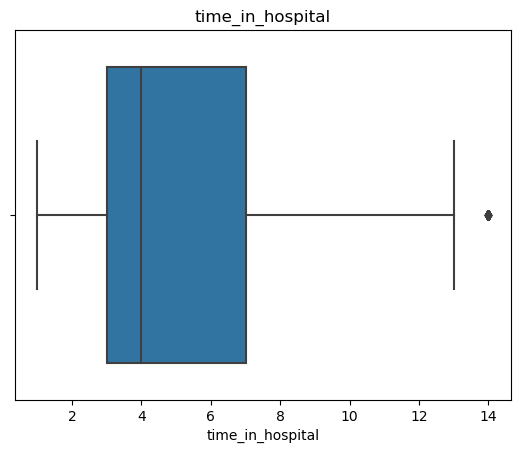

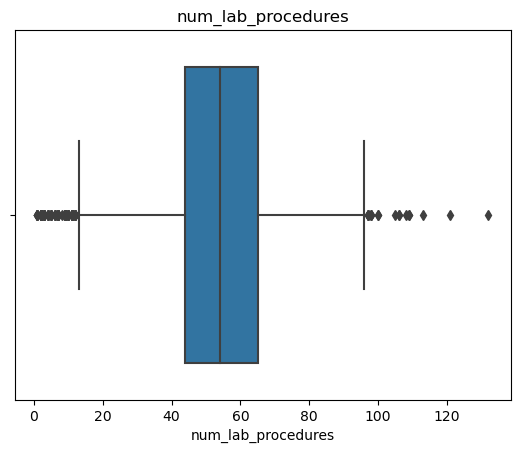

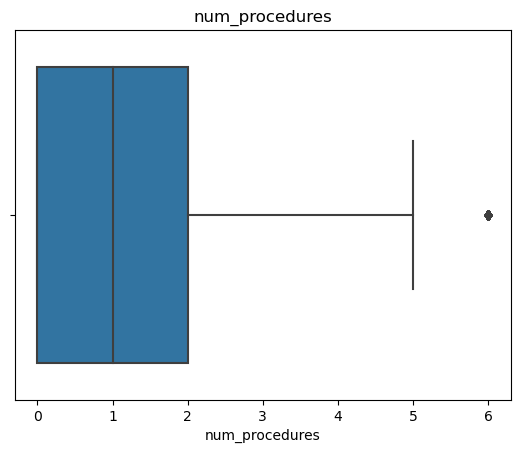

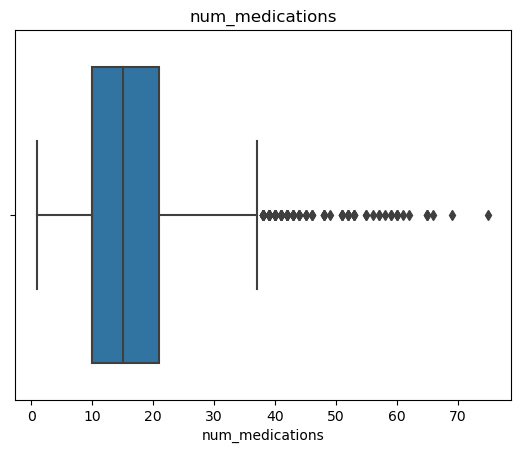

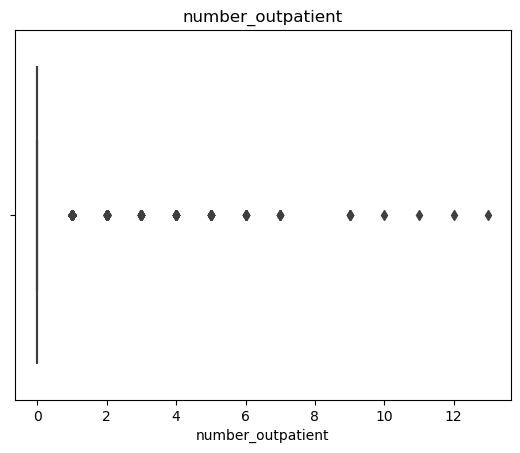

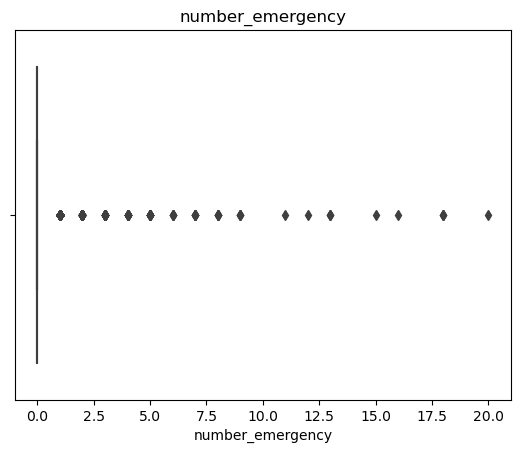

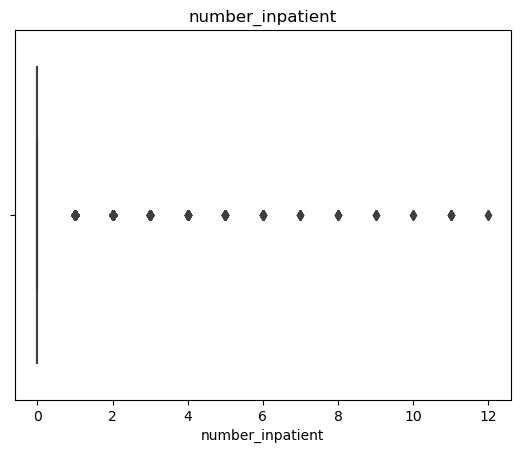

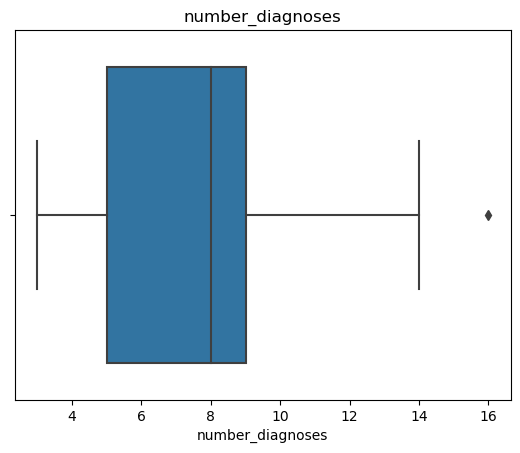

<Figure size 640x480 with 0 Axes>

In [27]:
for i in num_cols:
    sns.boxplot(data=df, x=df[i])
    plt.title(i)
    plt.figure()

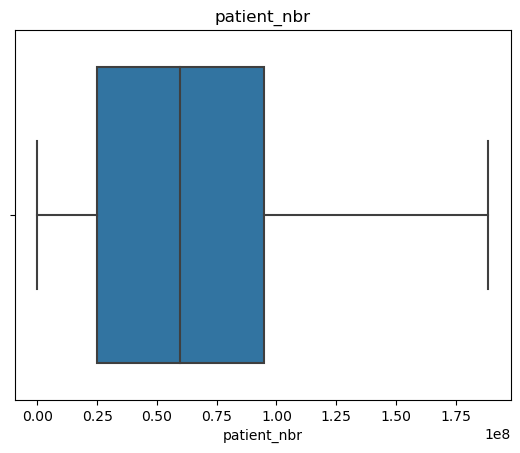

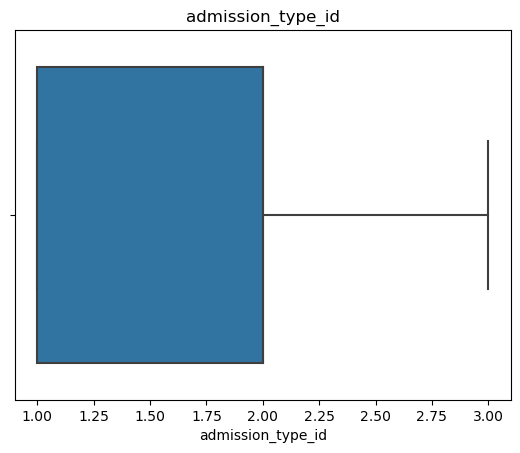

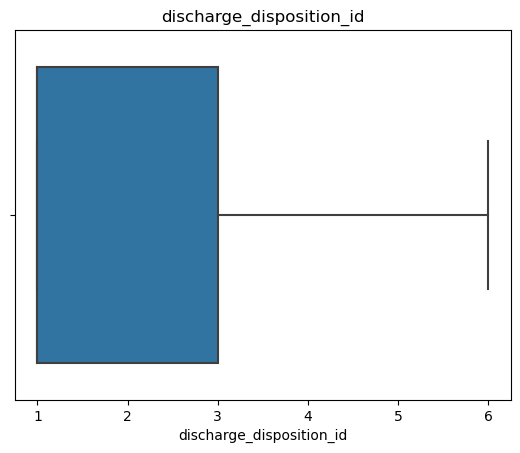

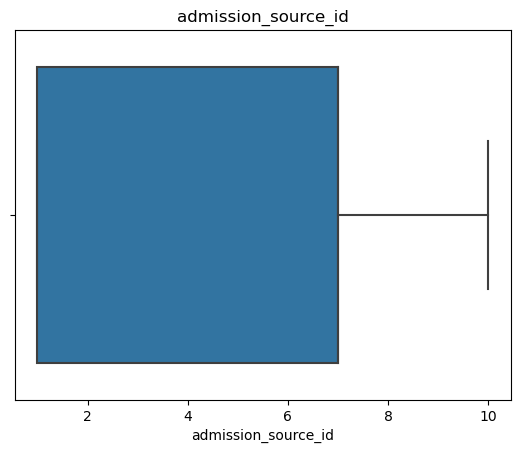

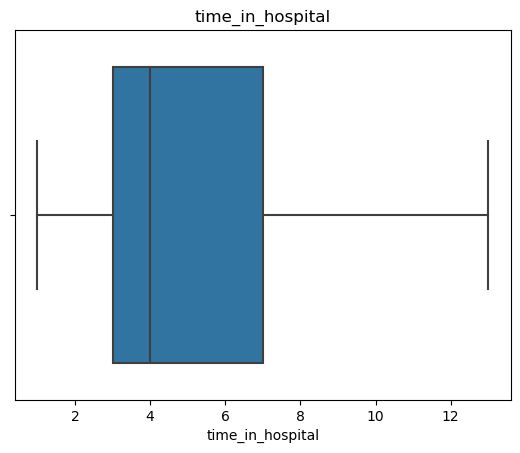

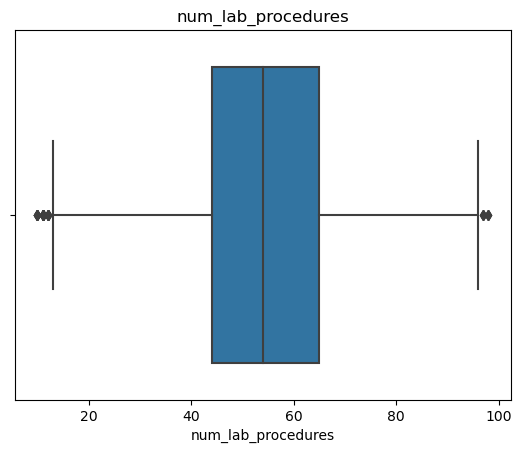

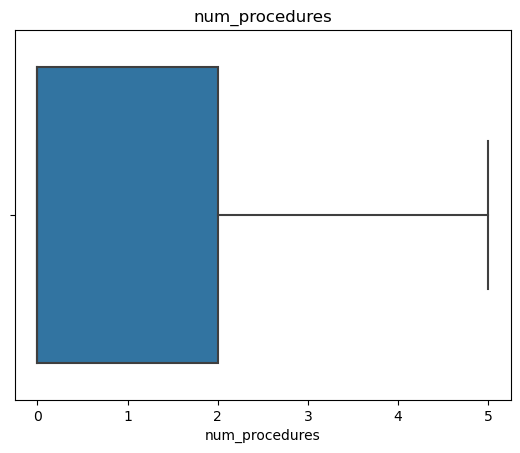

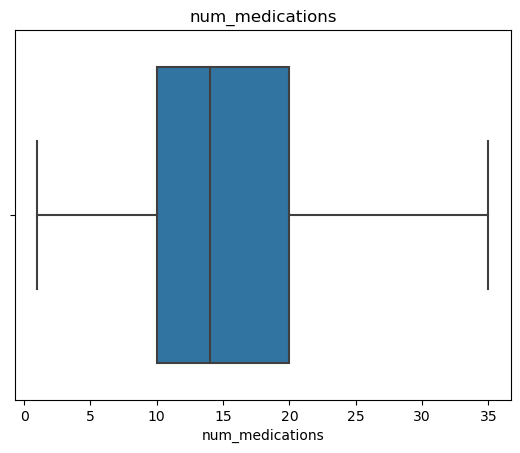

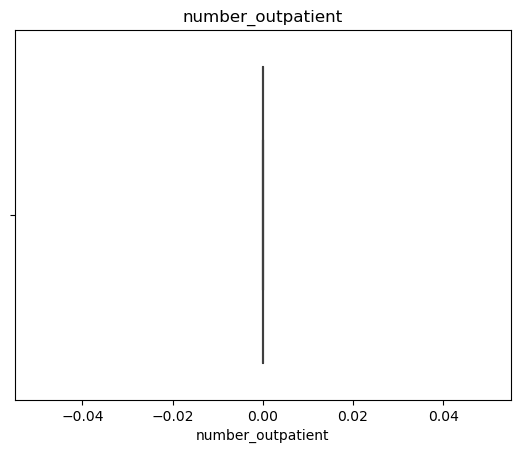

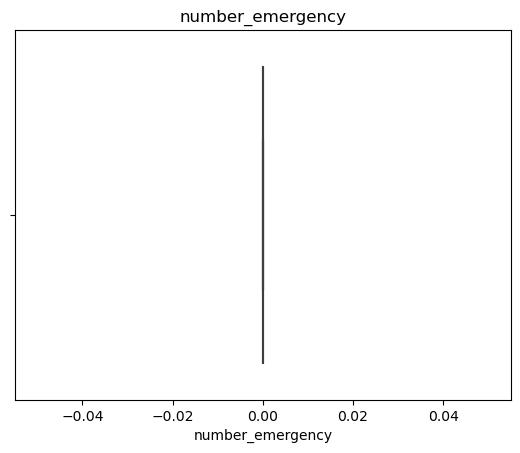

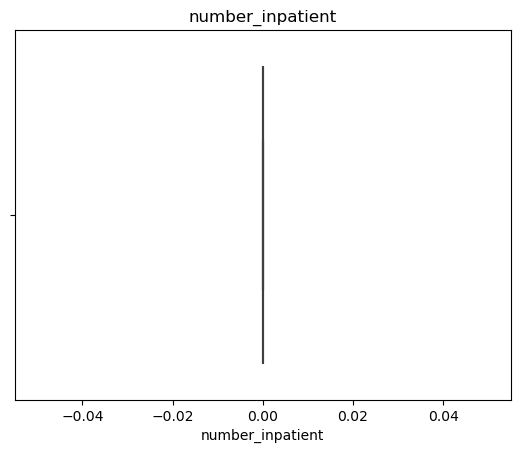

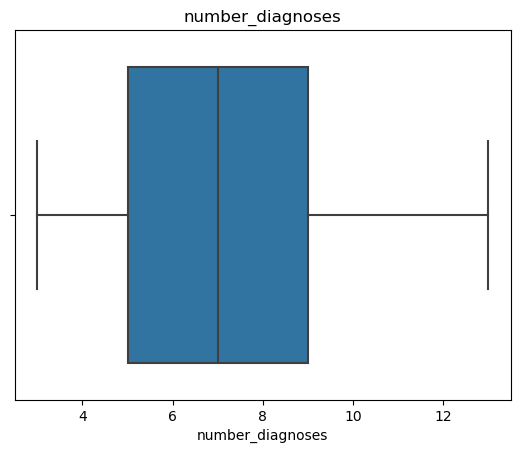

<Figure size 640x480 with 0 Axes>

In [28]:
for i in num_cols:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[i] >= Q1 - 1.5*IQR) & (df[i] <= Q3 + 1.5*IQR)]
    sns.boxplot(data = df, x=df[i])
    plt.title(i)
    plt.figure()

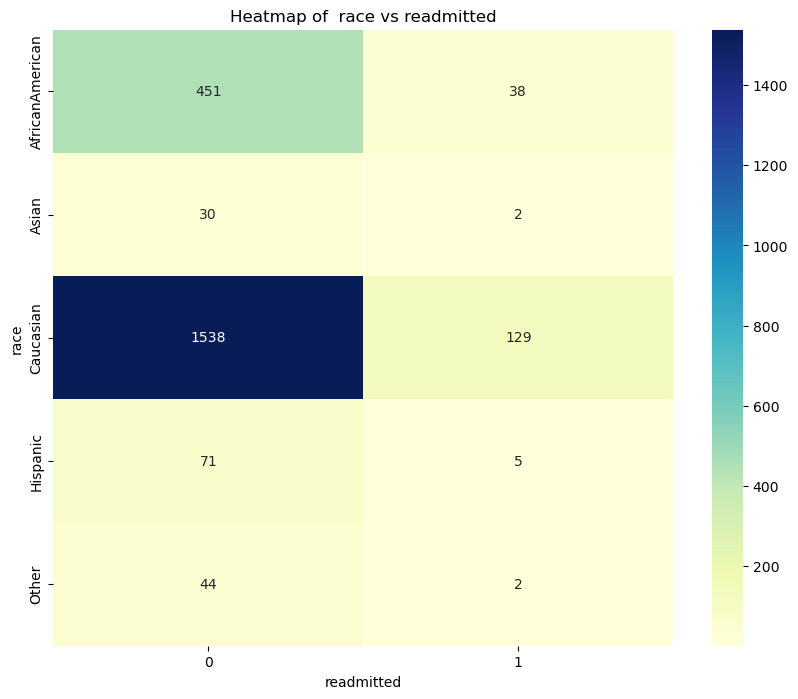

<Figure size 640x480 with 0 Axes>

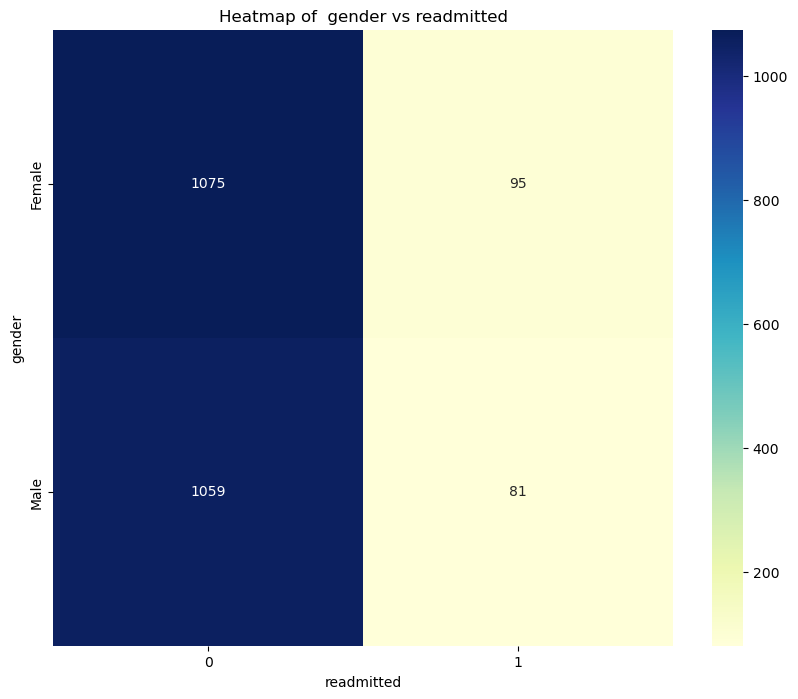

<Figure size 640x480 with 0 Axes>

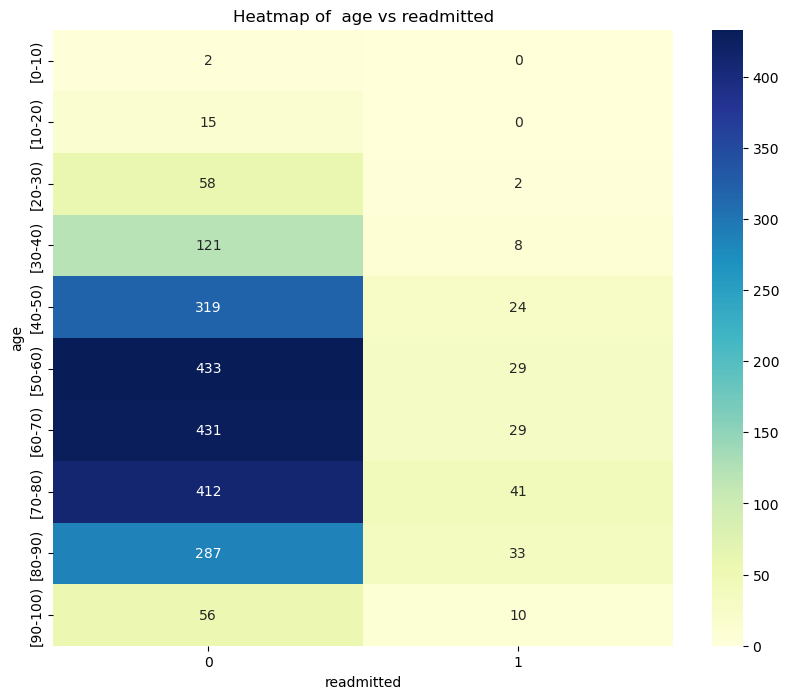

<Figure size 640x480 with 0 Axes>

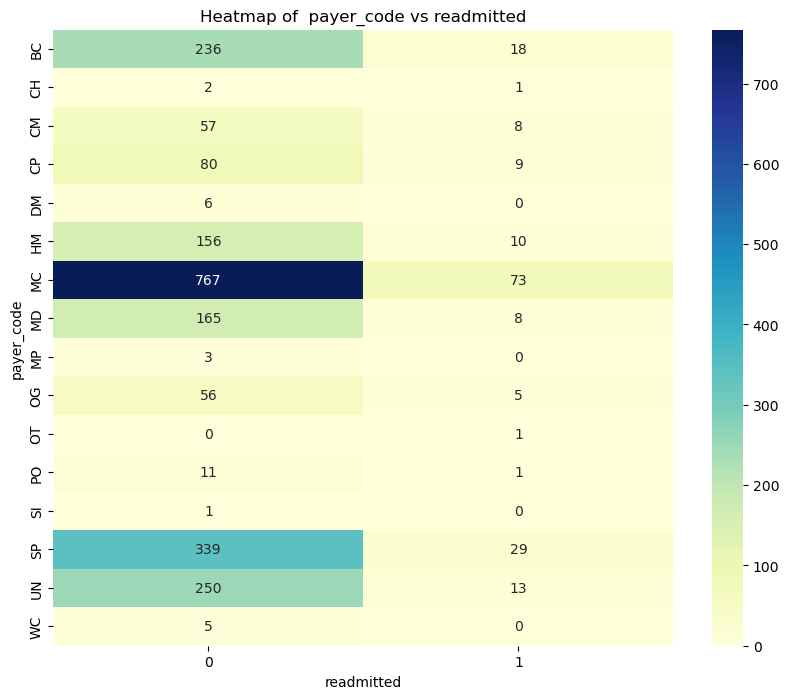

<Figure size 640x480 with 0 Axes>

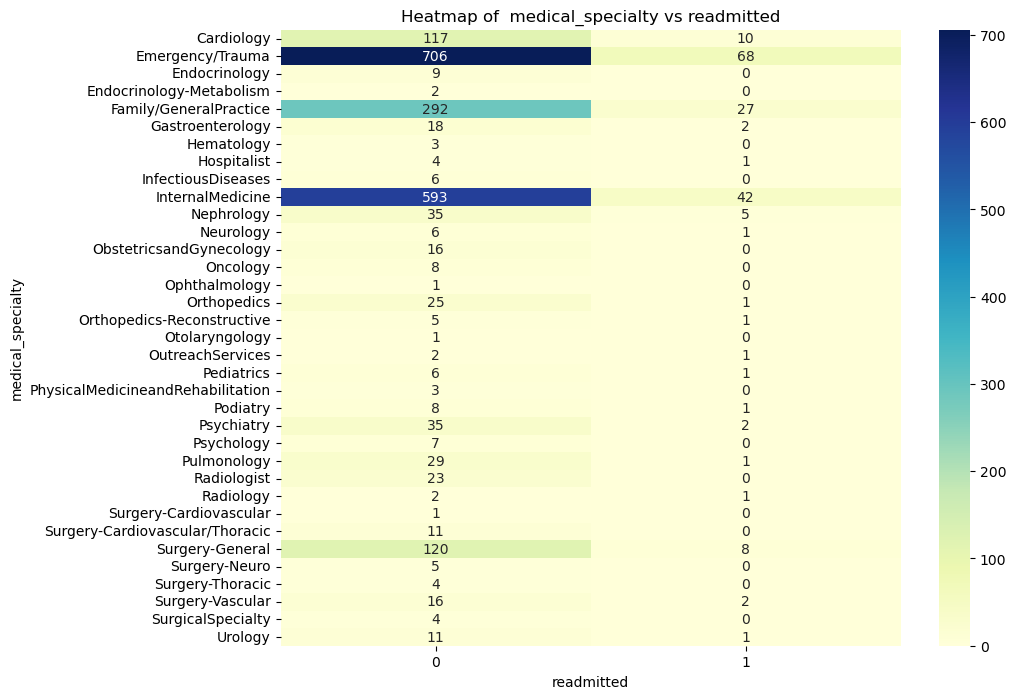

<Figure size 640x480 with 0 Axes>

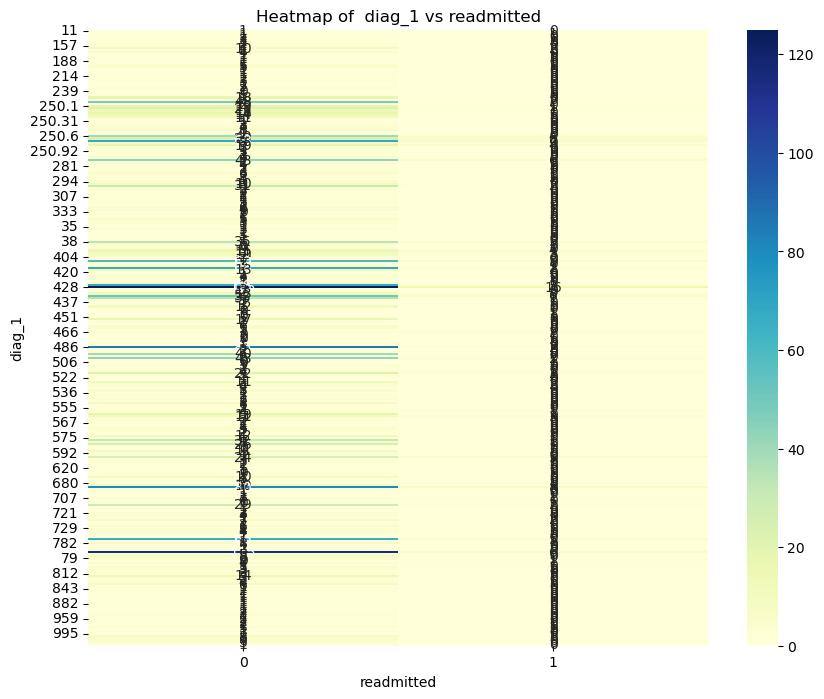

<Figure size 640x480 with 0 Axes>

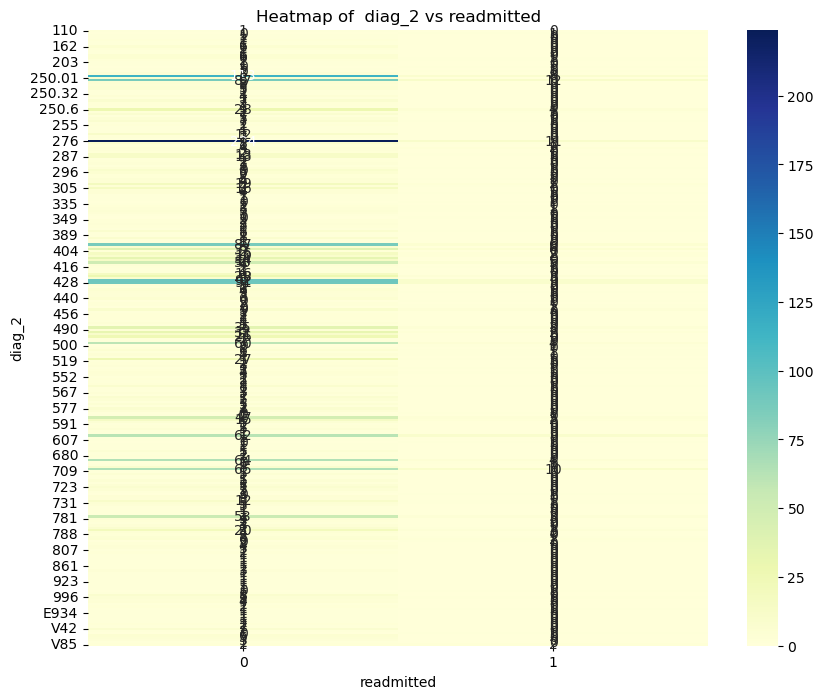

<Figure size 640x480 with 0 Axes>

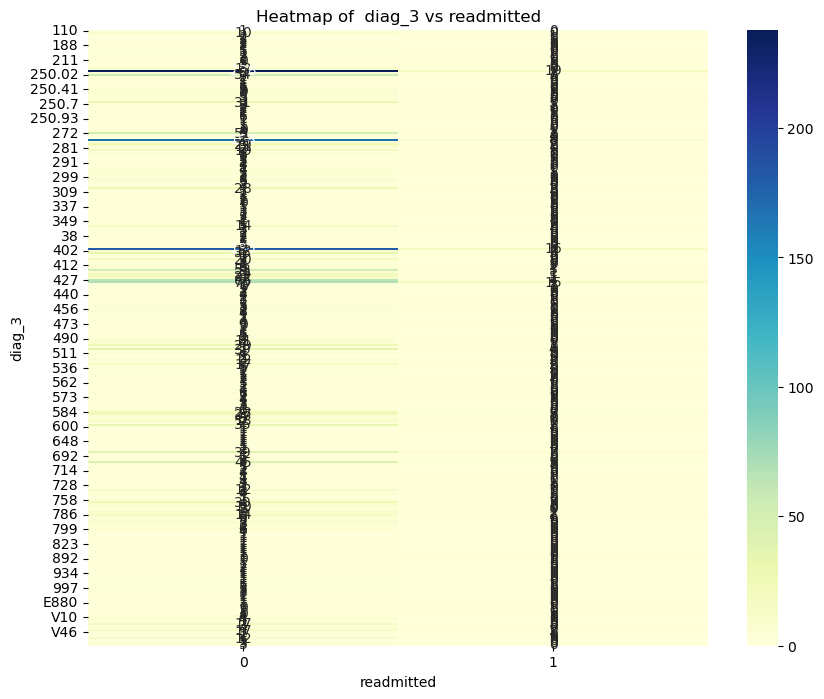

<Figure size 640x480 with 0 Axes>

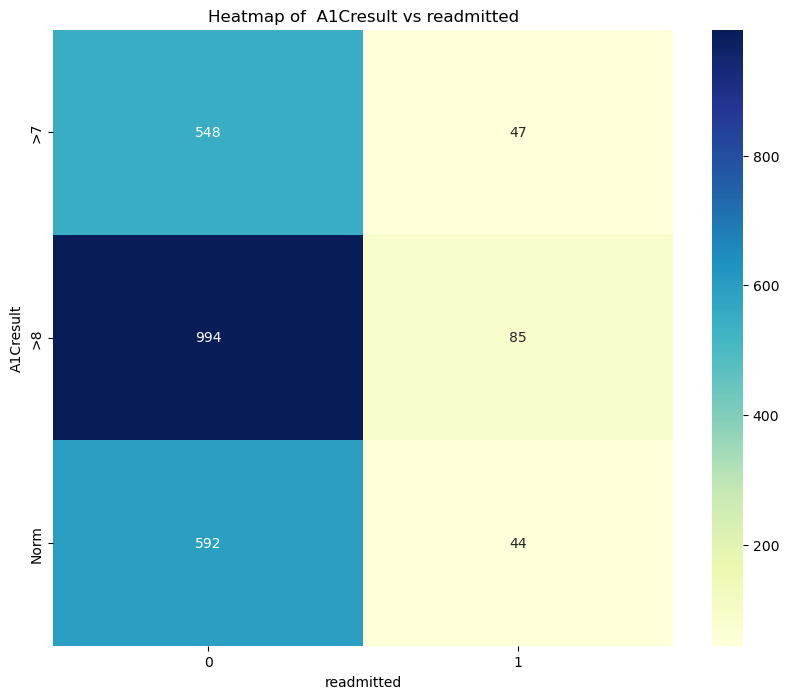

<Figure size 640x480 with 0 Axes>

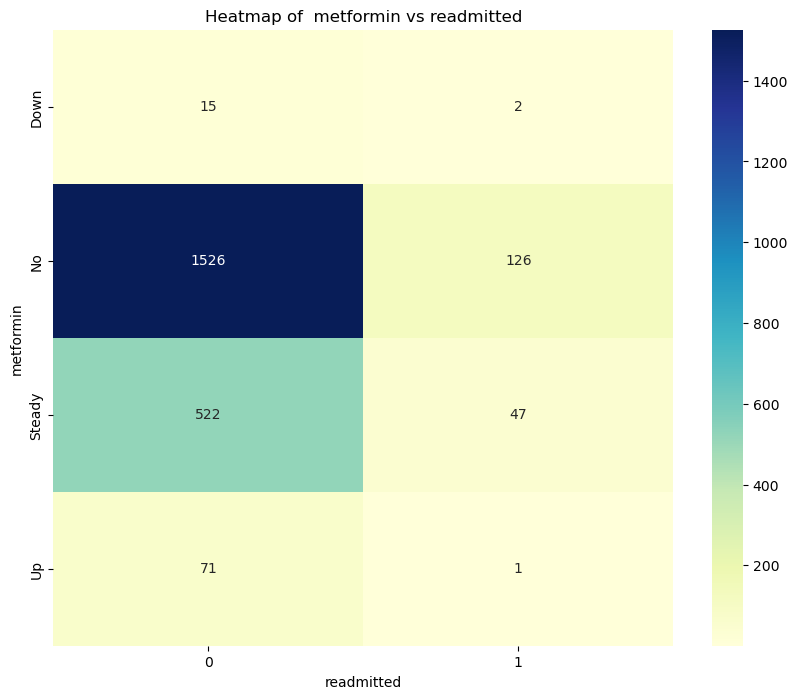

<Figure size 640x480 with 0 Axes>

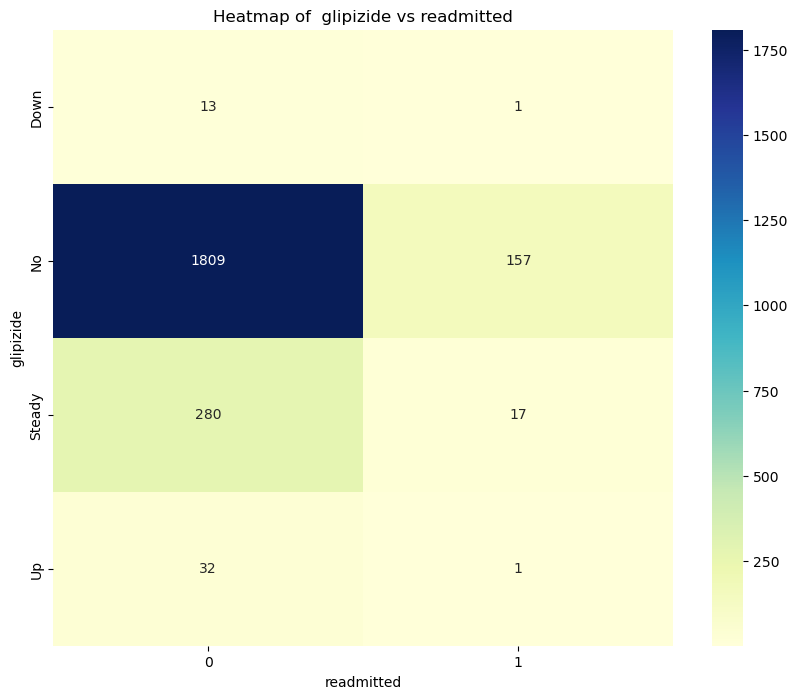

<Figure size 640x480 with 0 Axes>

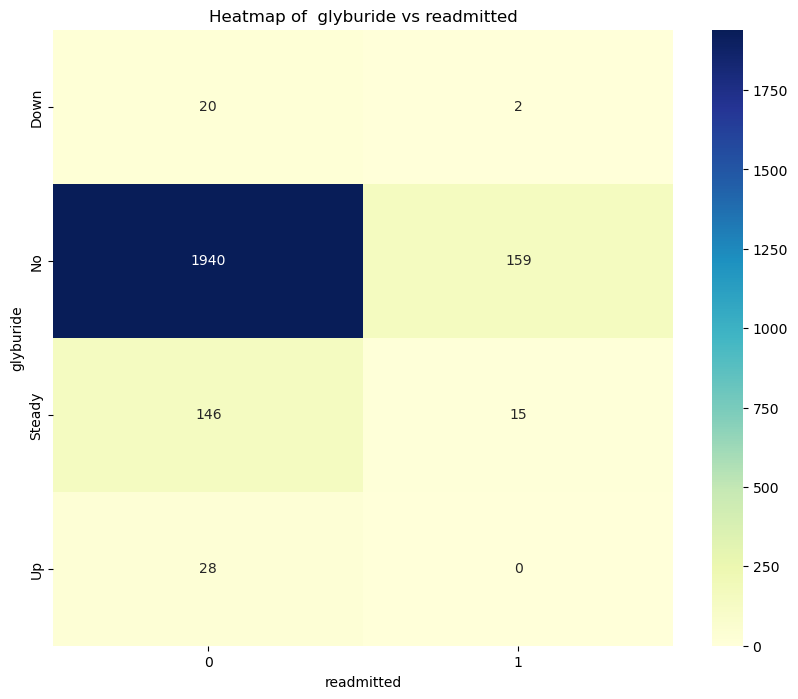

<Figure size 640x480 with 0 Axes>

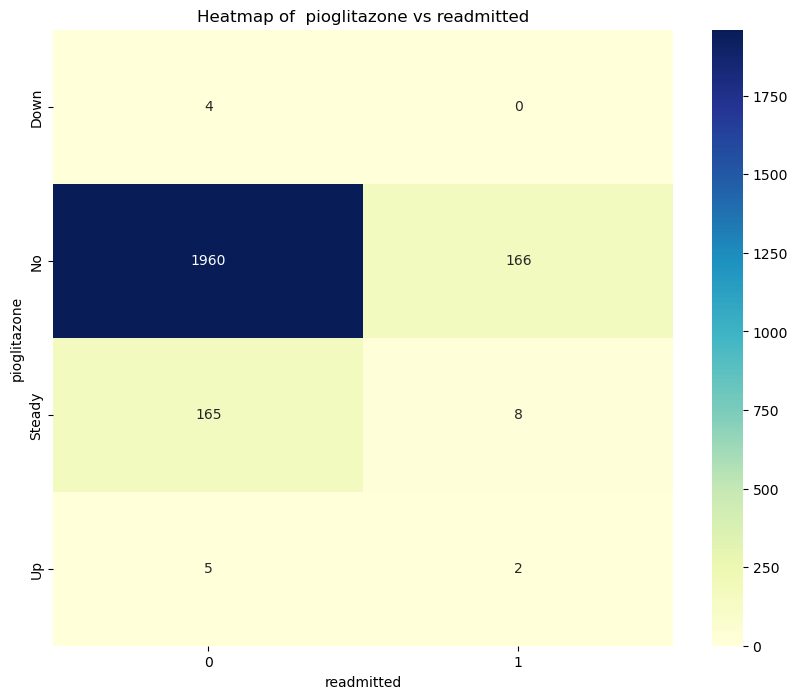

<Figure size 640x480 with 0 Axes>

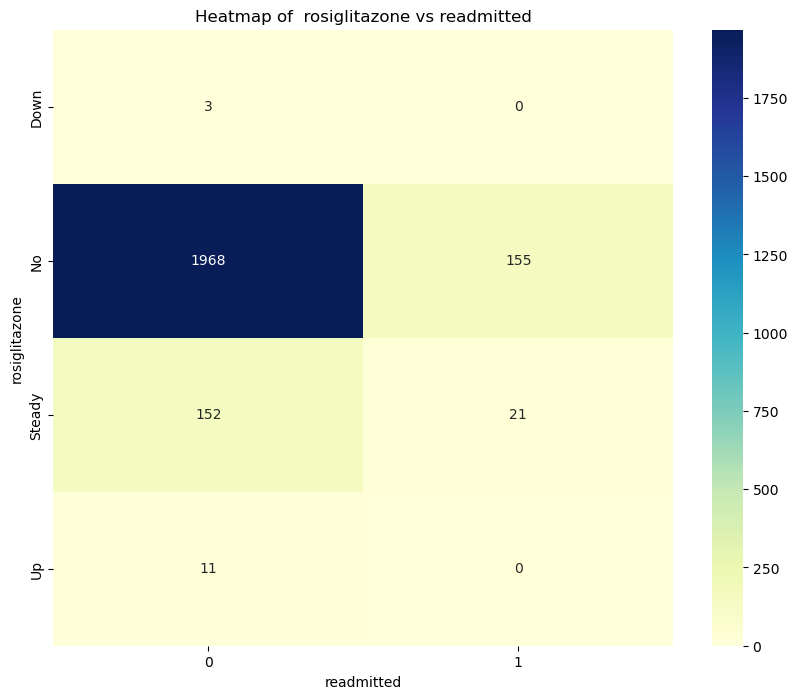

<Figure size 640x480 with 0 Axes>

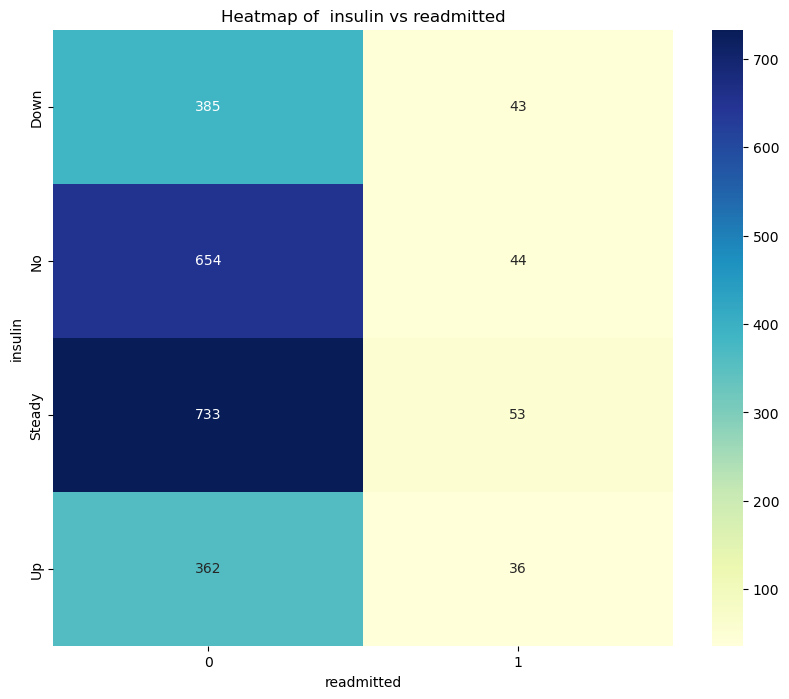

<Figure size 640x480 with 0 Axes>

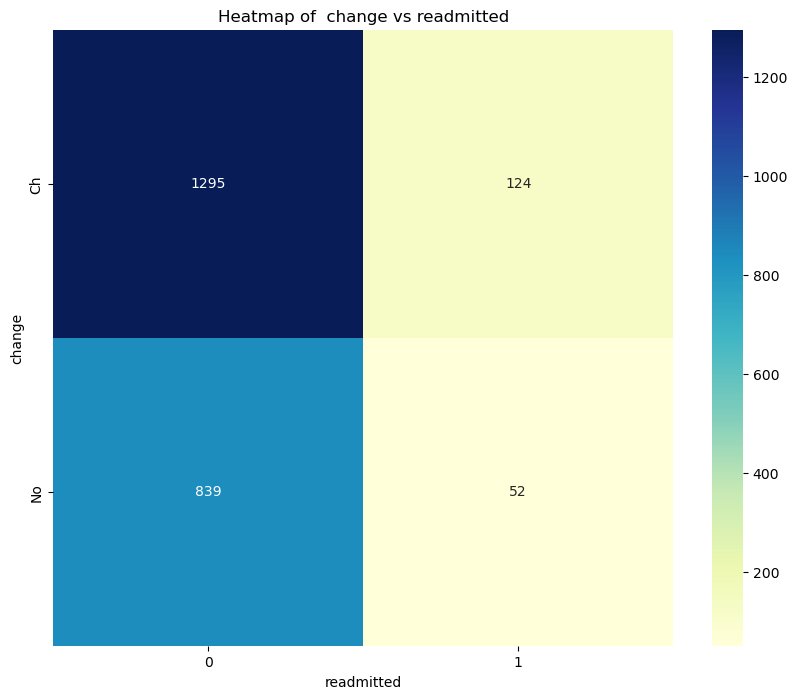

<Figure size 640x480 with 0 Axes>

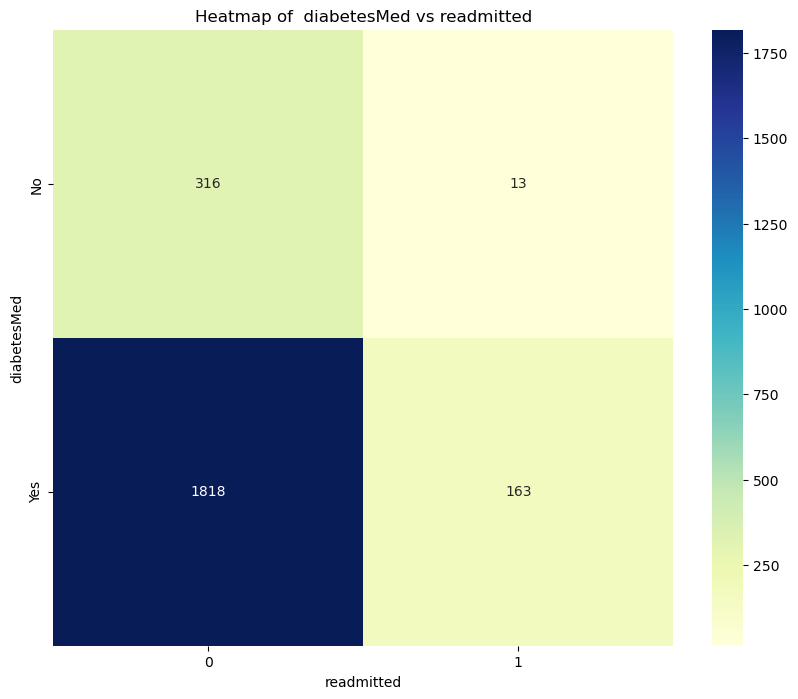

<Figure size 640x480 with 0 Axes>

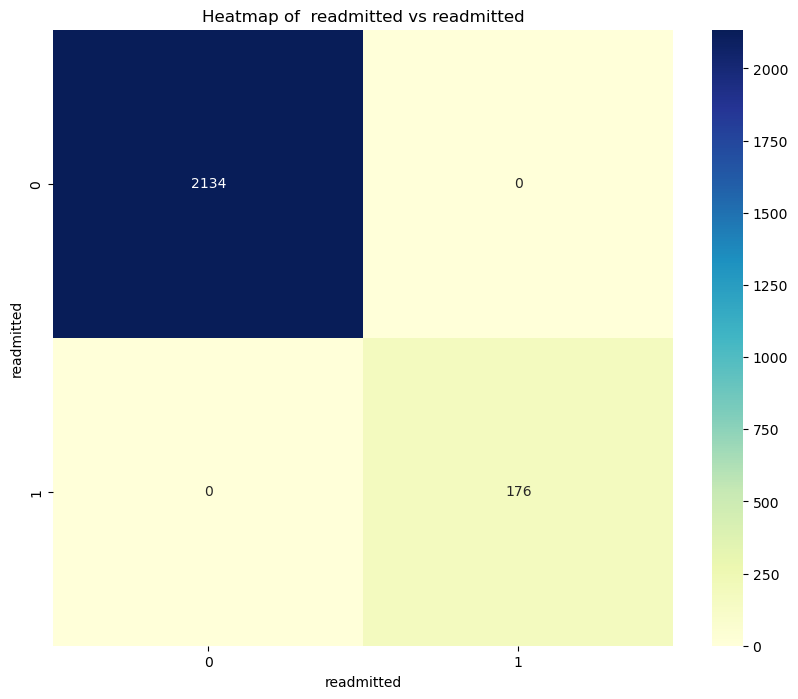

<Figure size 640x480 with 0 Axes>

In [29]:
for i in cat_cols:
    cat_cat = pd.crosstab(df[i], df['readmitted'])
    # Plotting a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(cat_cat, annot=True, cmap="YlGnBu", fmt="d")
    plt.title(f'Heatmap of  {i} vs readmitted')
    plt.xlabel('readmitted')
    plt.ylabel(i)
    plt.show()
    plt.figure()

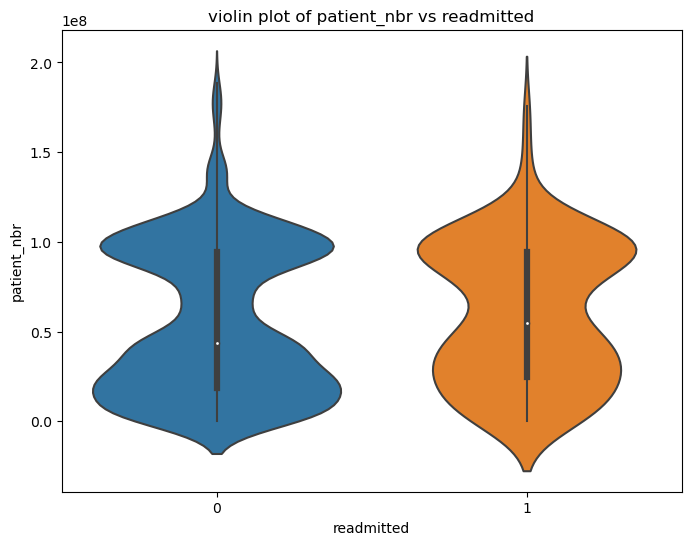

<Figure size 640x480 with 0 Axes>

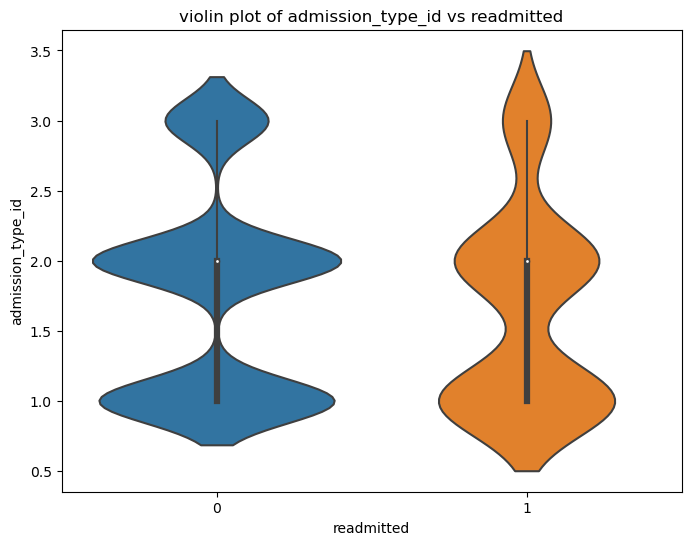

<Figure size 640x480 with 0 Axes>

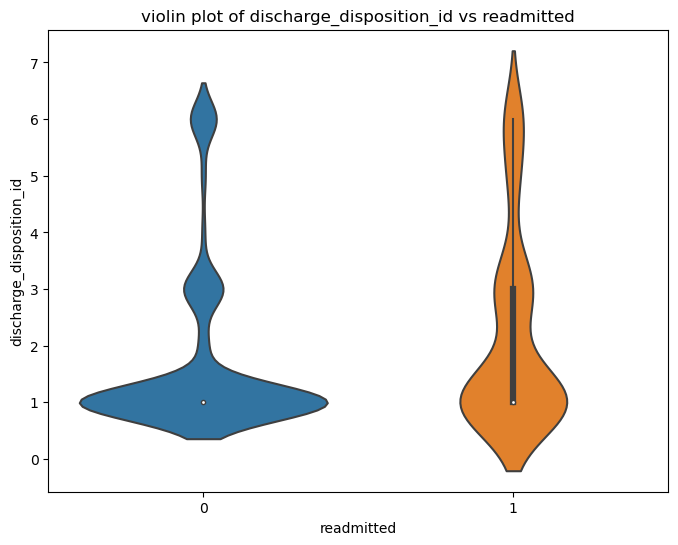

<Figure size 640x480 with 0 Axes>

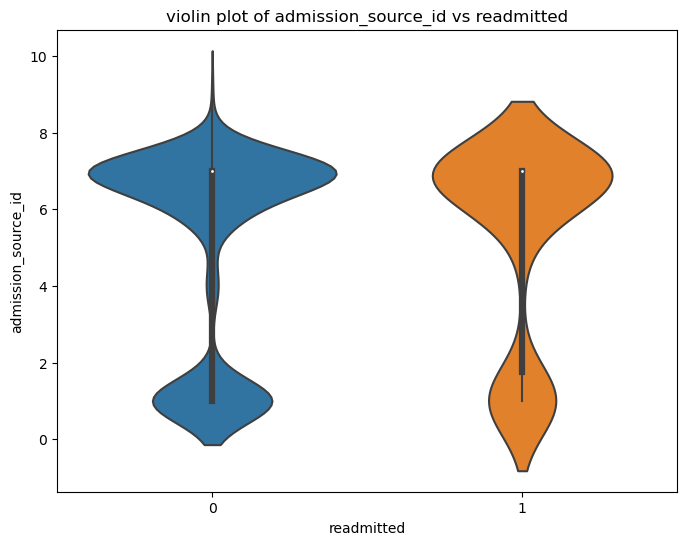

<Figure size 640x480 with 0 Axes>

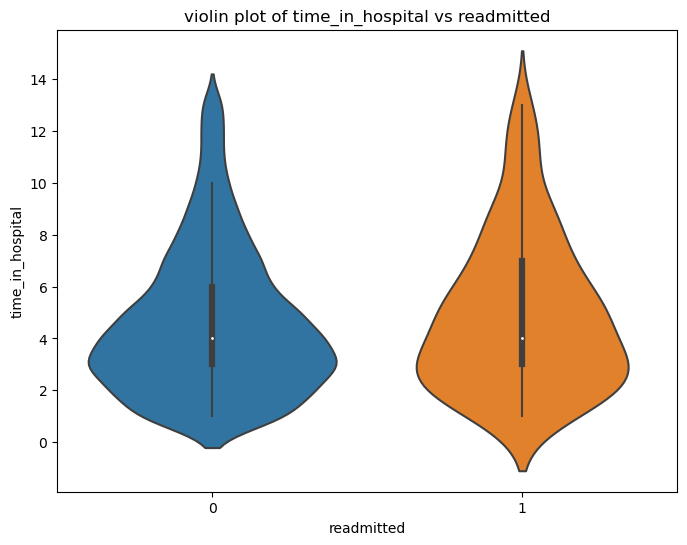

<Figure size 640x480 with 0 Axes>

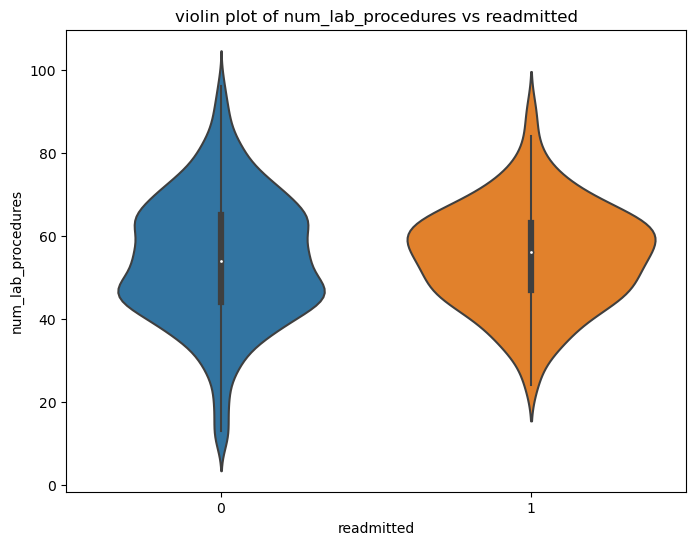

<Figure size 640x480 with 0 Axes>

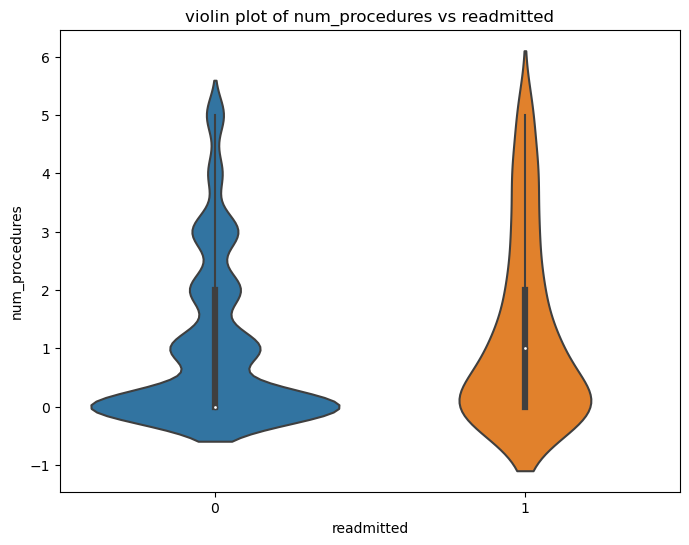

<Figure size 640x480 with 0 Axes>

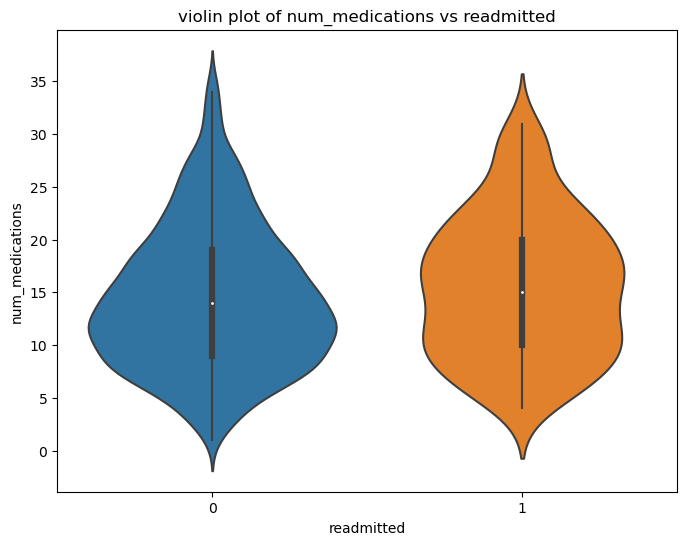

<Figure size 640x480 with 0 Axes>

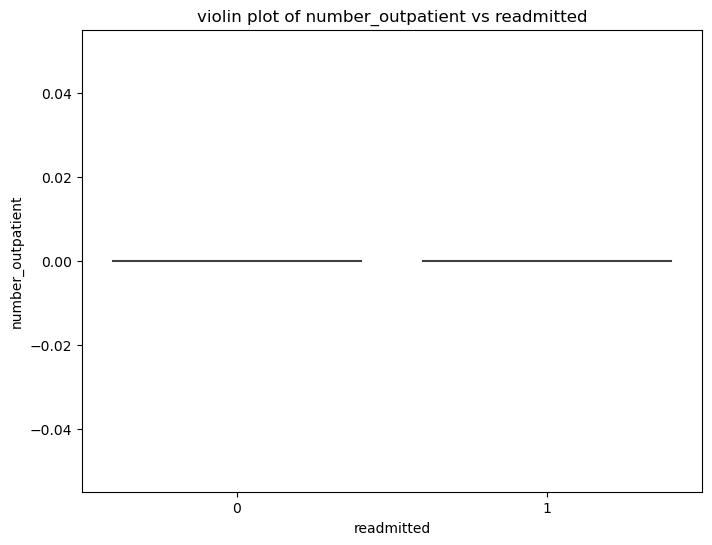

<Figure size 640x480 with 0 Axes>

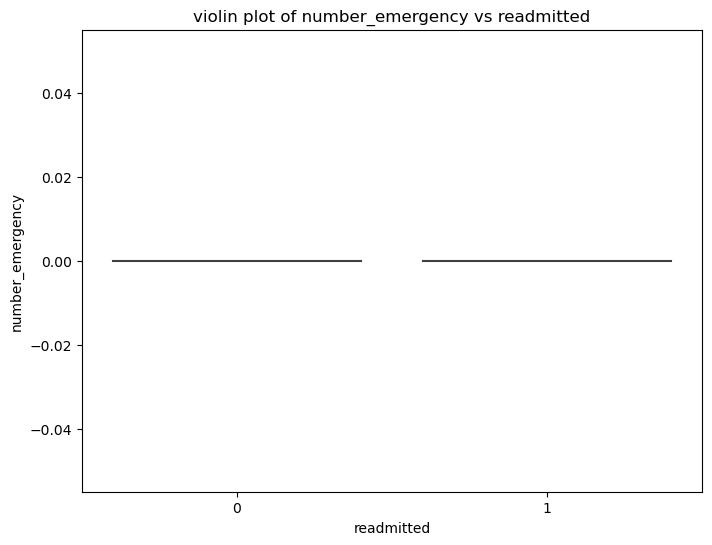

<Figure size 640x480 with 0 Axes>

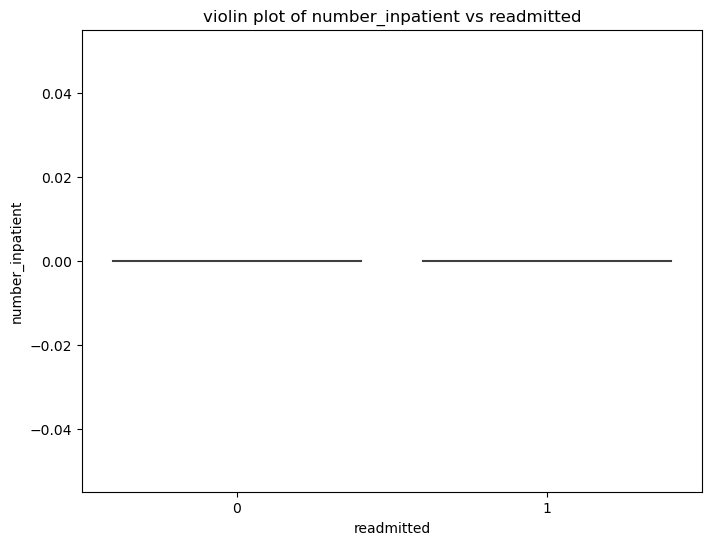

<Figure size 640x480 with 0 Axes>

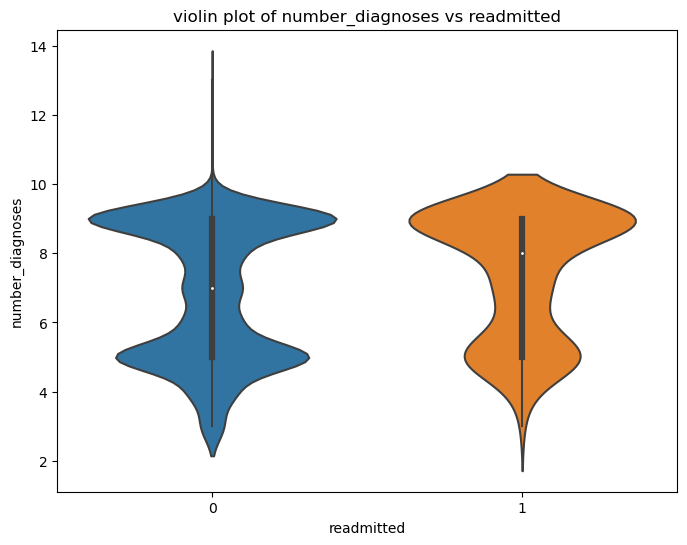

<Figure size 640x480 with 0 Axes>

In [30]:
for i in num_cols:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=df.readmitted, y=i, data=df)
    plt.title(f'violin plot of {i} vs readmitted')
    plt.show()
    plt.figure()

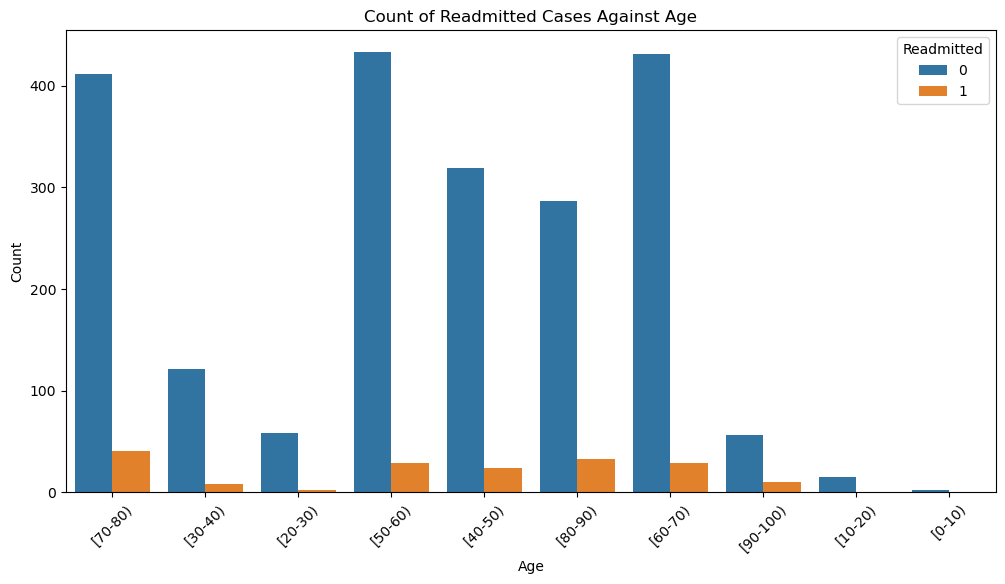

In [31]:
plt.figure(figsize=(12, 6))
sns.countplot(x='age', hue='readmitted', data=df)
plt.title('Count of Readmitted Cases Against Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Readmitted', loc='upper right')
plt.show()

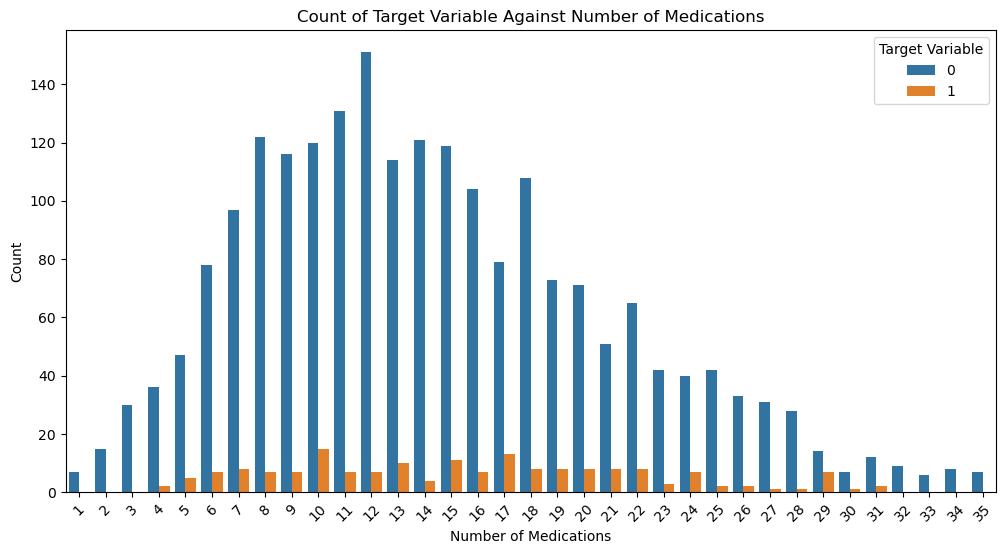

In [32]:
plt.figure(figsize=(12, 6))
sns.countplot(x='num_medications', hue='readmitted', data=df)
plt.title('Count of Target Variable Against Number of Medications')
plt.xlabel('Number of Medications')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Target Variable', loc='upper right')
plt.show()

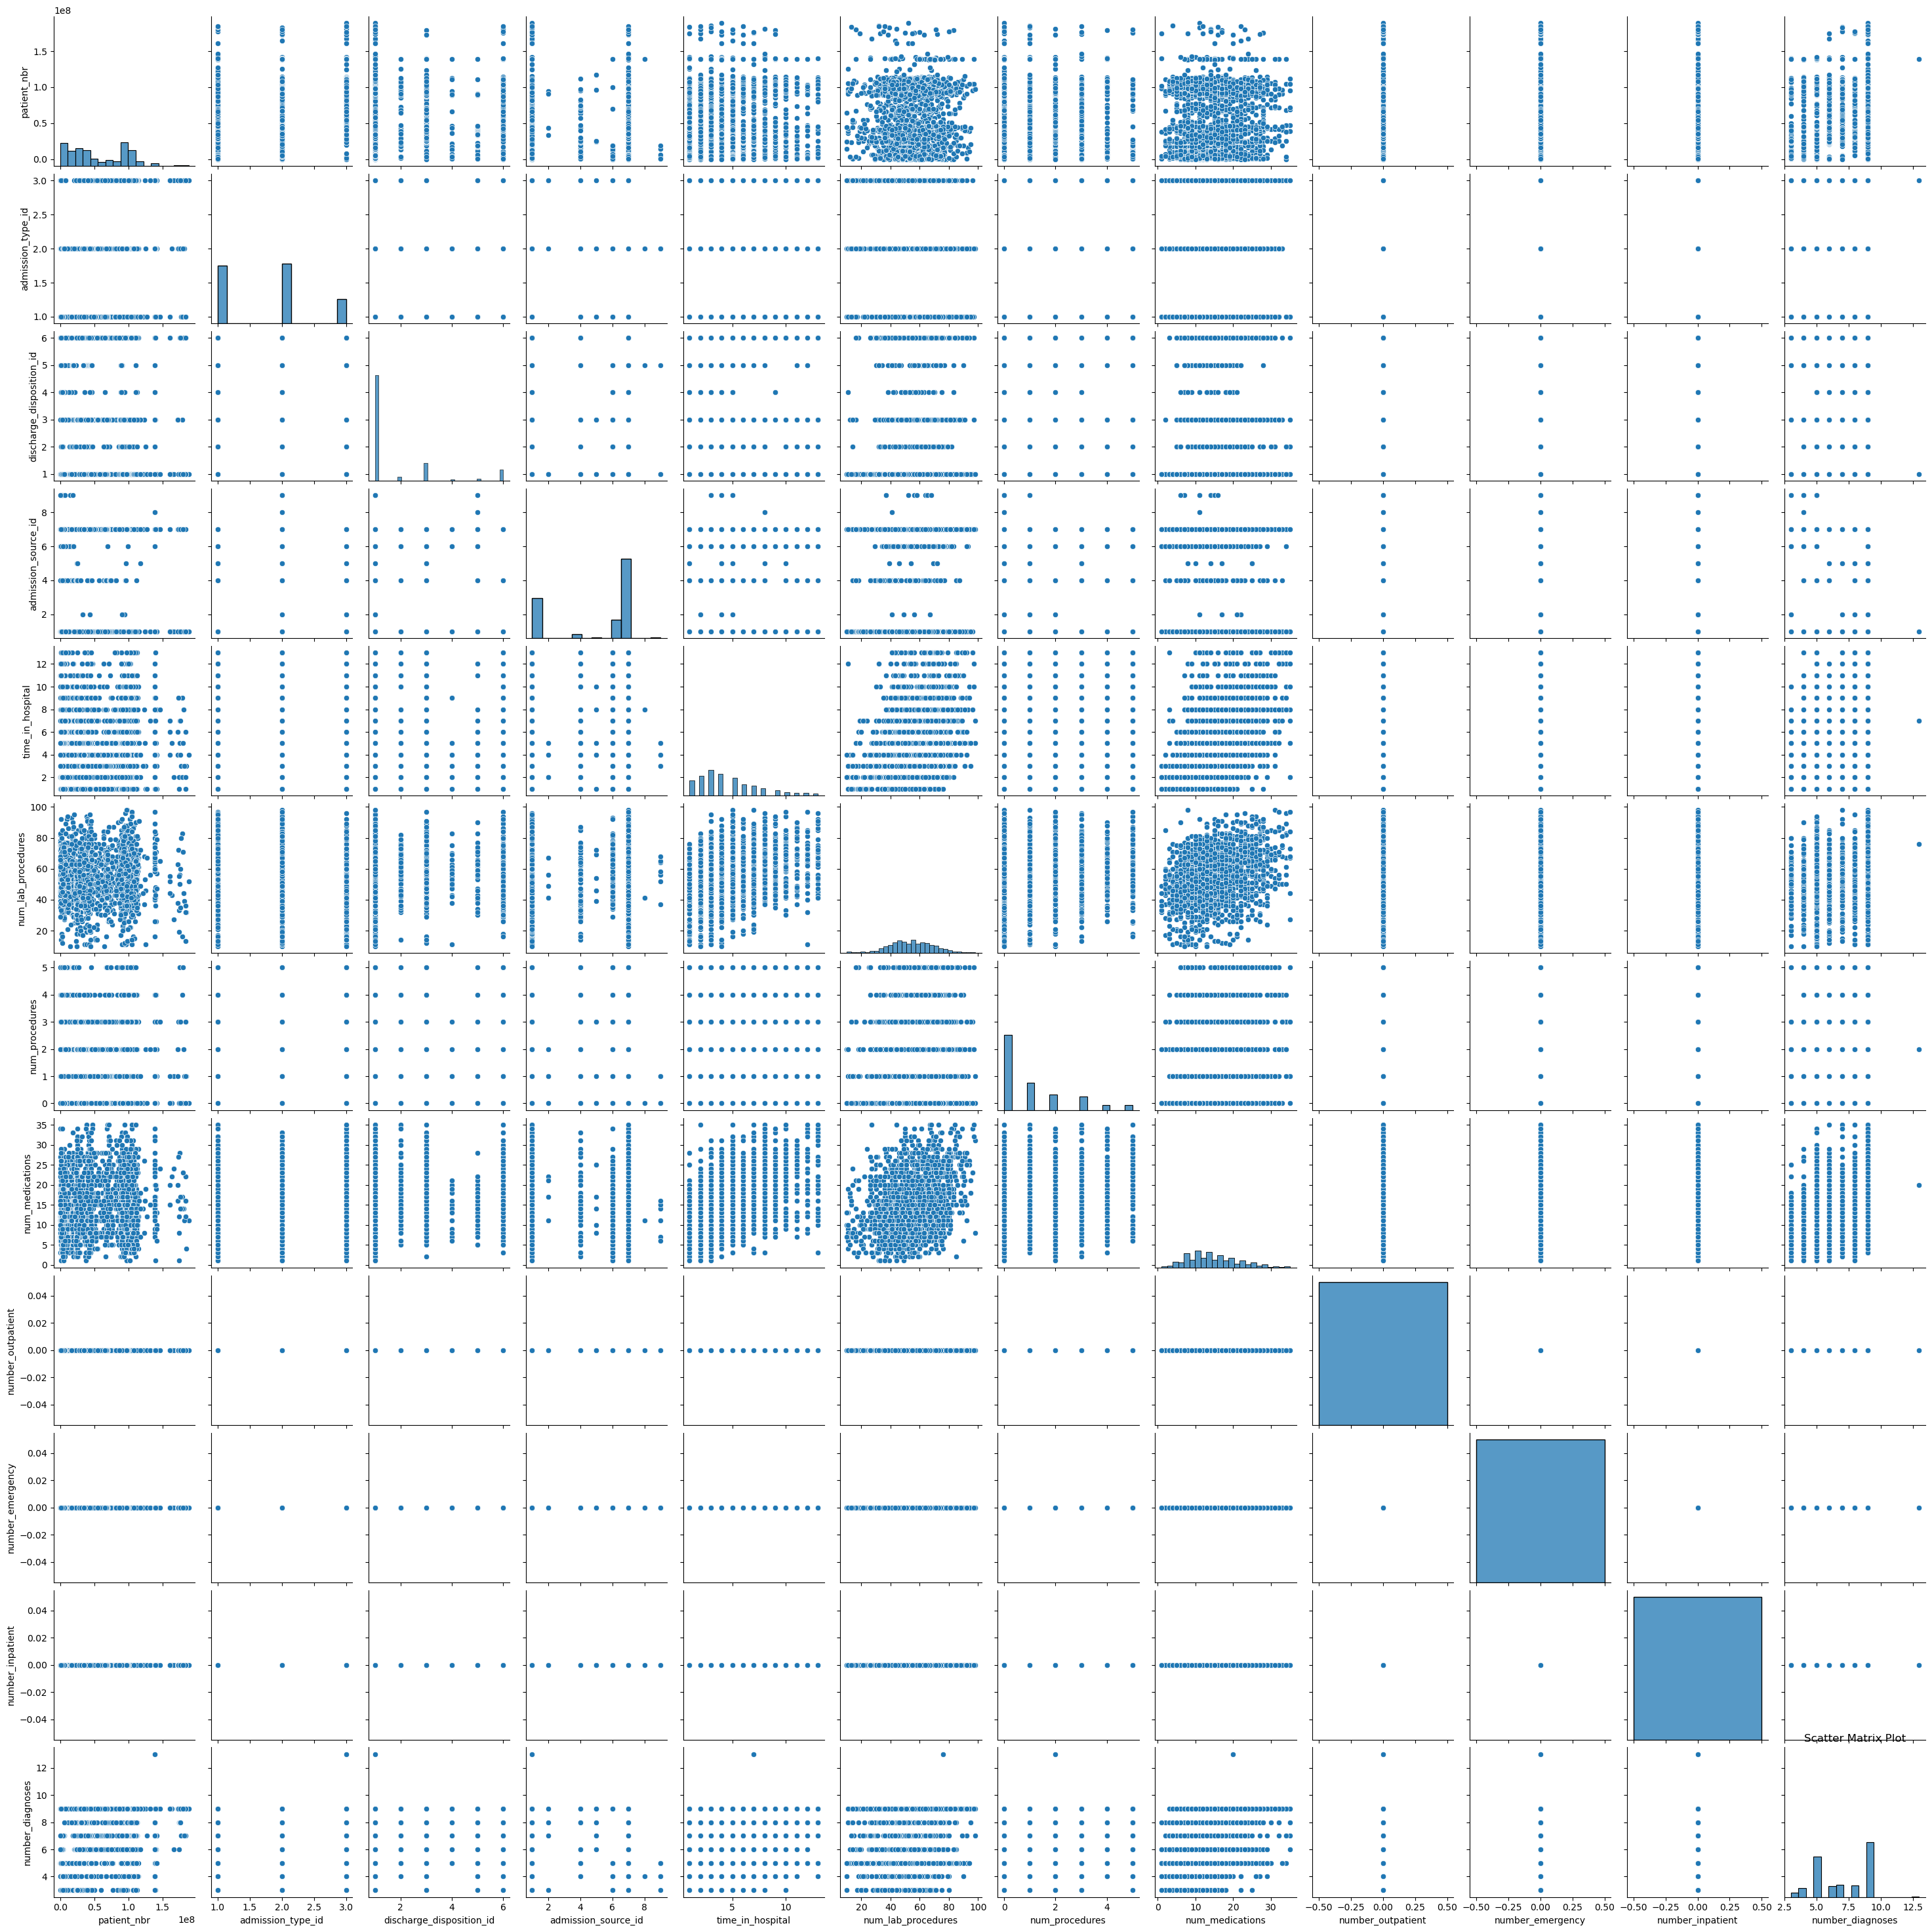

In [525]:
sns.pairplot(df)
plt.title('Scatter Matrix Plot')
plt.show()

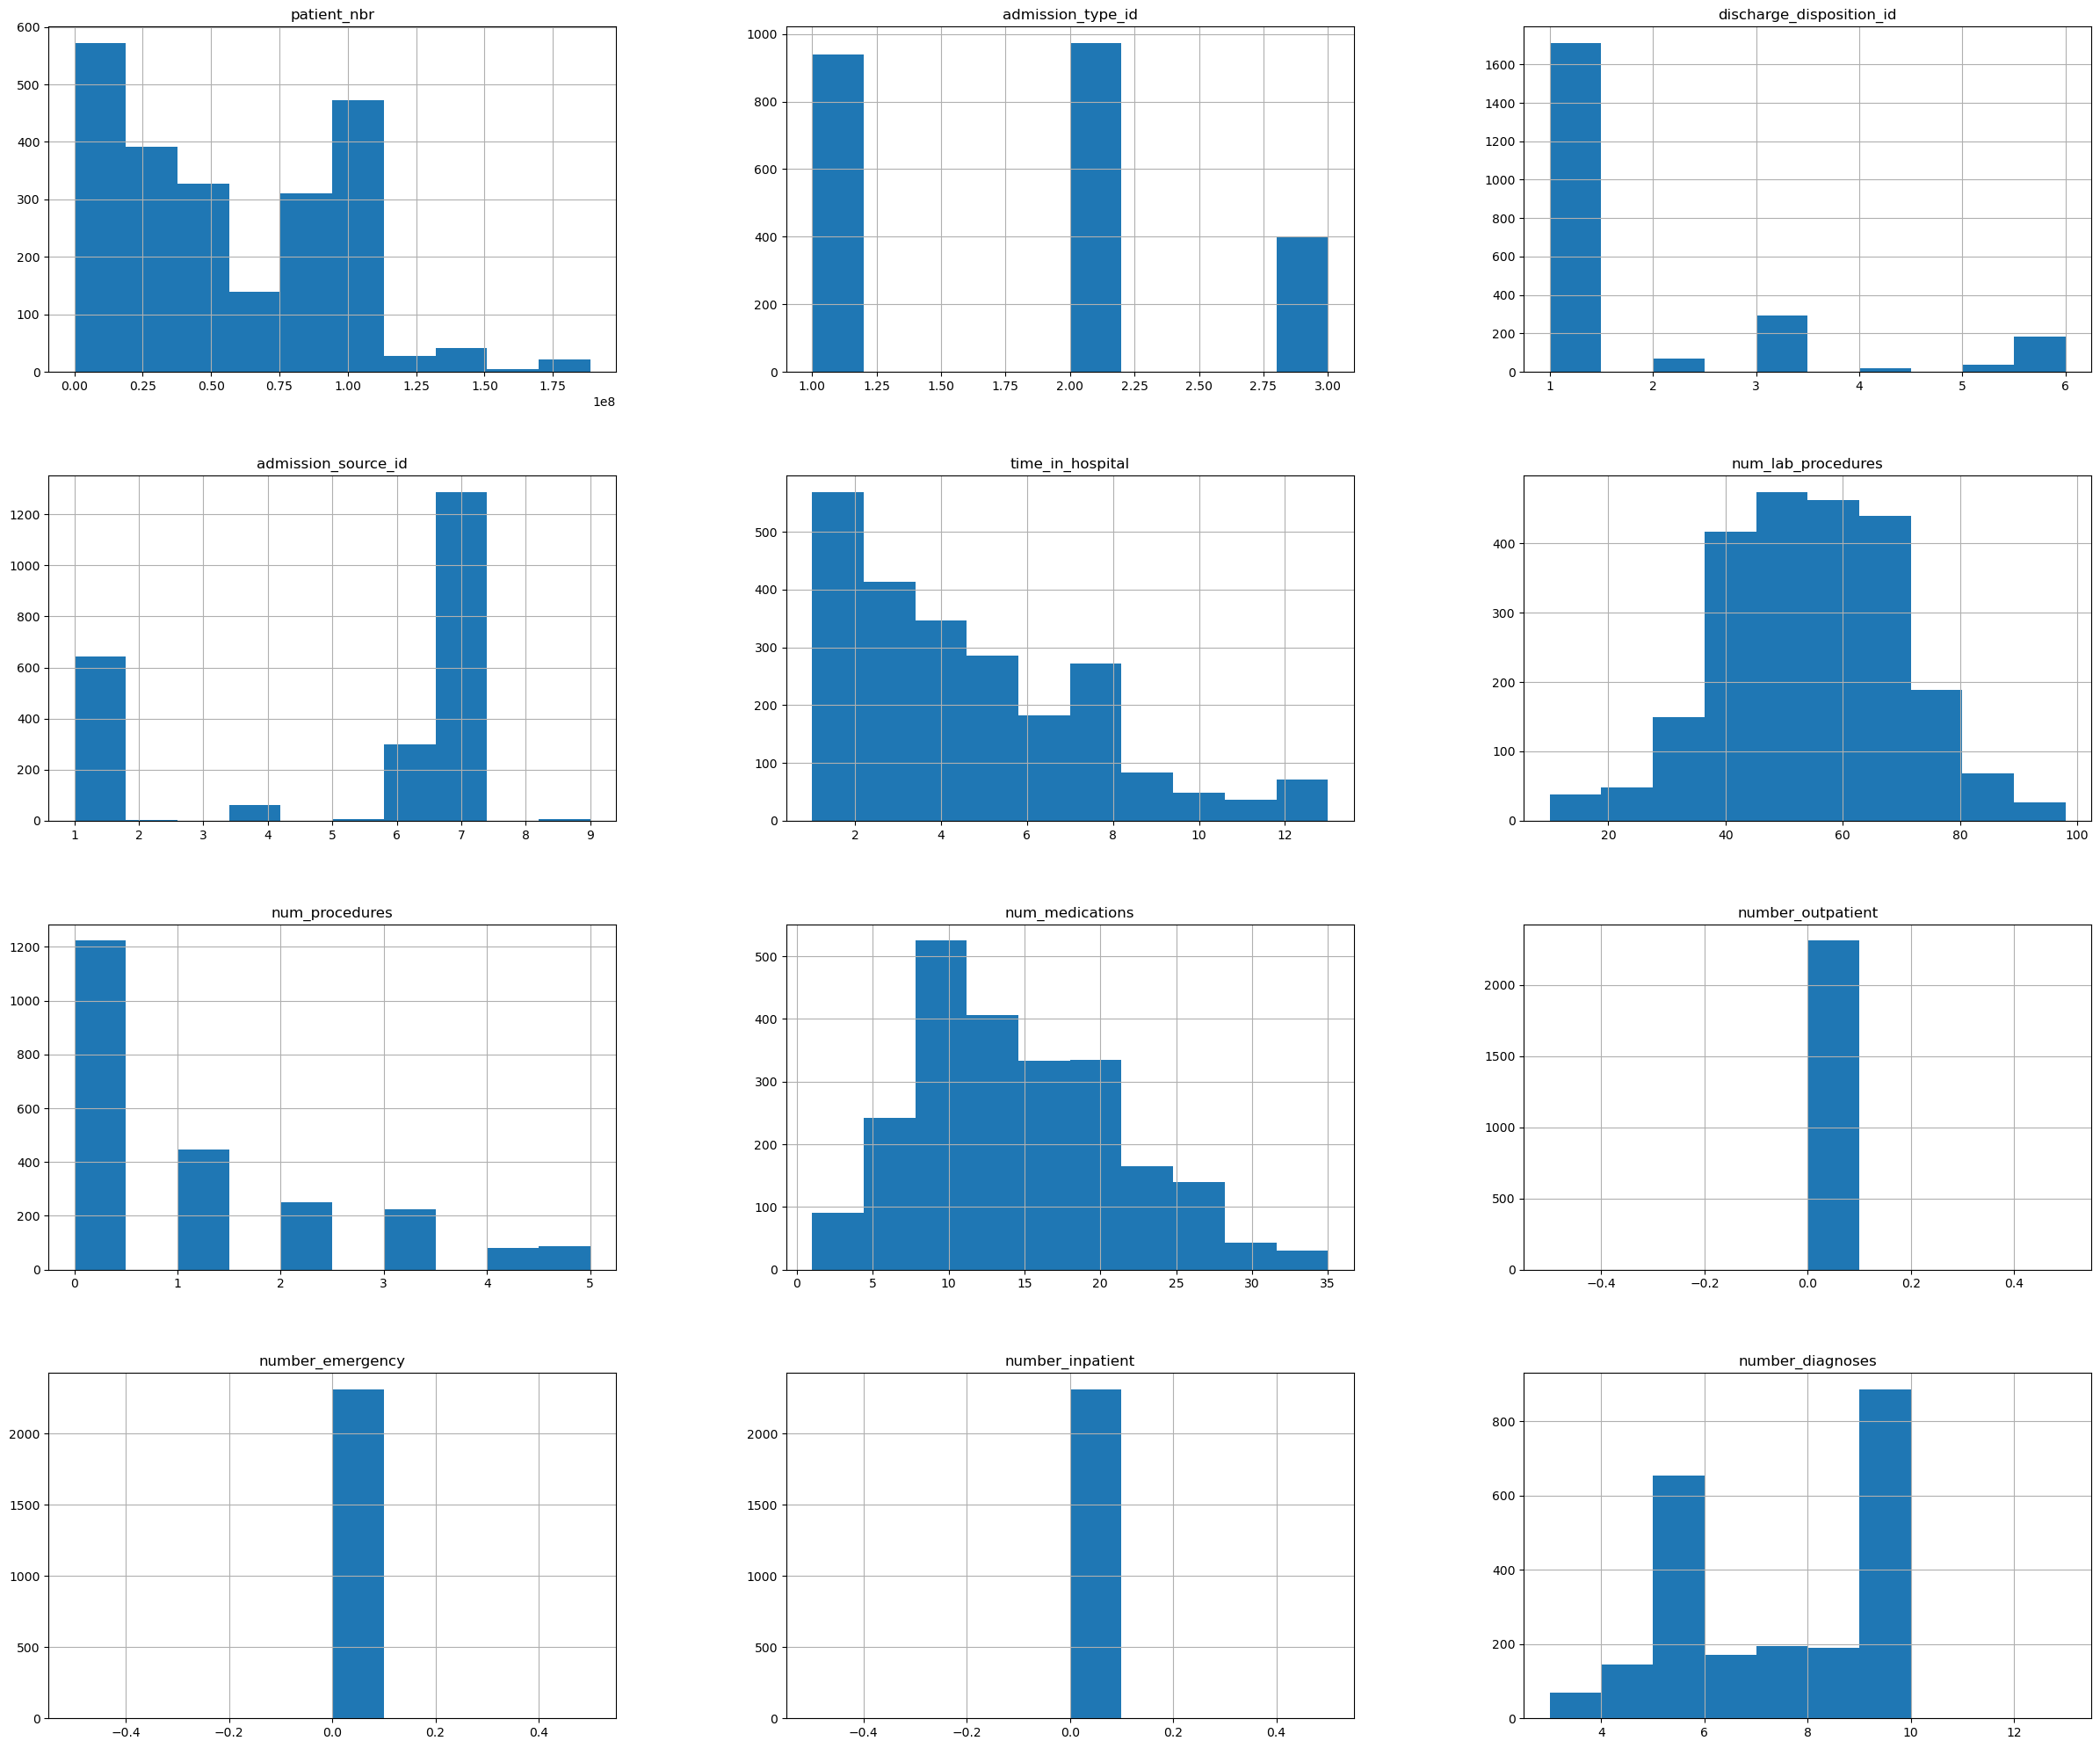

In [526]:
df.hist(figsize=(30,25))
plt.show()

In [527]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2310 entries, 23879 to 101720
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   patient_nbr               2310 non-null   int64 
 1   race                      2310 non-null   object
 2   gender                    2310 non-null   object
 3   age                       2310 non-null   object
 4   admission_type_id         2310 non-null   int64 
 5   discharge_disposition_id  2310 non-null   int64 
 6   admission_source_id       2310 non-null   int64 
 7   time_in_hospital          2310 non-null   int64 
 8   payer_code                2310 non-null   object
 9   medical_specialty         2310 non-null   object
 10  num_lab_procedures        2310 non-null   int64 
 11  num_procedures            2310 non-null   int64 
 12  num_medications           2310 non-null   int64 
 13  number_outpatient         2310 non-null   int64 
 14  number_emergency       